# London Bike Sharing: Exploratory Data Analysis  
**Dataset:** London Bike Sharing Dataset (https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset)

This dataset was obtained from Kaggle and contains hourly bike-sharing activity recorded in London.The data originates from a public bike-sharing system that records rental demand along with environmental and time-based conditions at each observation. 

This dataset contains observations the count of bike rentals (demand) by hour, and records contextual factors of each observations such as date, temperature, weather conditions, humidity, and wind speed. 

The goal of this EDA is to evaluate and visualize relationships between these variables in order to determine how bike demand is influenced by environmental and temporal factors before performing any predictive modeling or reporting.

---

## Table of Contents

1. [Data Acquisition](#1-data-acquisition)
2. [Data Overview & Structure](#2-data-overview--structure)
3. [Data Quality Assessment](#3-data-quality-assessment)
4. [Univariate Analysis](#4-univariate-analysis)
5. [Temporal Analysis](#5-temporal-analysis)
   - [5.1 All-Time Overview](#51-time-series-overview)
   - [5.2 By Year](#52-average-bike-shares-by-year)
   - [5.3 By Month](#53-average-bike-shares-by-month)
   - [5.4 By Day of Month](#54-average-bike-shares-by-day-of-month)
   - [5.5 By Day of Week](#55-average-bike-shares-by-day-of-week)
   - [5.6 By Hour of Day](#56-average-bike-shares-by-hour-of-day)
   - [5.7 Temporal Heatmaps](#57-temporal-heatmaps)
6. [Weather Impact Analysis](#6-weather-impact-analysis)
7. [Correlation Analysis](#7-correlation-analysis)
8. [Statistical Summary](#8-statistical-summary)
9. [Data Export for Visualization](#9-data-export-for-visualization)

---

## 1. Data Acquisition

### 1.1 Dataset Source

The London Bike Sharing dataset is sourced from Kaggle and contains daily bike rental counts from London's bike-sharing system. The dataset includes:

- **Temporal features:** Date, hour, day of week, season
- **Weather features:** Temperature, humidity, wind speed, weather conditions
- **Target variable:** Count of bike rentals

This dataset is ideal for analyzing demand patterns and understanding how external factors influence transportation behavior in urban environments.

In [2]:
# Install required packages (uncomment and run if not installed)
# %pip install kagglehub pandas openpyxl matplotlib seaborn numpy scipy

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from scipy import stats
from datetime import datetime
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully")

Libraries imported successfully


### 1.2 Download Dataset

In [4]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")
print(f"Dataset path: {path}")

Dataset path: C:\Users\m\.cache\kagglehub\datasets\hmavrodiev\london-bike-sharing-dataset\versions\1


In [5]:
# Locate CSV files in the downloaded dataset
def find_csv_files(path):
    """Recursively find all CSV files in the given path."""
    csv_paths = {}
    
    for root, _, files in os.walk(path):
        for f in files:
            if f.lower().endswith(".csv"):
                if f not in csv_paths: # Only add non-duplicate files
                    csv_paths[f] = []
                csv_paths[f].append(os.path.join(root, f))
    
    if not csv_paths:
        raise FileNotFoundError(f"No CSV files found in {path}")
    
    return csv_paths

csv_paths = find_csv_files(path)
print(f"Found {len(csv_paths)} CSV file(s):")
for filename, paths in csv_paths.items():
    print(f"  - {filename}")

Found 1 CSV file(s):
  - london_merged.csv


### 1.3 Load Data

In [6]:
# Load the dataset
csv_file = csv_paths['london_merged.csv'][0]
bikes = pd.read_csv(csv_file)

print(f"Dataset loaded successfully")
print(f"Shape: {bikes.shape[0]:,} rows × {bikes.shape[1]} columns")
bikes.shape

Dataset loaded successfully
Shape: 17,414 rows × 10 columns


(17414, 10)

---

## 2. Data Overview & Structure

### 2.1 Initial Data Inspection

In [7]:
# Display first rows
print("First 10 rows of the dataset:")
bikes.head(10)

First 10 rows of the dataset:


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [8]:
# Dataset information
print("Dataset Information:")
print("=" * 45)
bikes.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### 2.2 Data Table

This dataset contains weather, temporal, and environmental factors that influence bike-sharing demand in London. The table below documents the **original column structure** from the raw dataset, serving as a reference to identify any mismatches between column names, data types, and their intended descriptions.

| Column Name | Description | Data Type | Values/Units |
|------------|-------------|-----------|-------------|
| **timestamp** | Date and time of each observation | datetime | YYYY-MM-DD HH:MM:SS format |
| **cnt** | Count of new bike shares recorded | integer | Primary target variable for demand analysis |
| **t1** | Real temperature at time of observation | float | Degrees Celsius (°C) |
| **t2** | Perceived "feels-like" temperature | float | Degrees Celsius (°C), accounts for wind chill/heat index |
| **hum** | Humidity level during observation | float | Percentage (%) |
| **wind_speed** | Wind speed at time of observation | float | Kilometers per hour (kph) |
| **weather_code** | Categorized weather conditions | integer | See weather categories below |
| **is_holiday** | Holiday indicator | boolean | 1 = Holiday, 0 = Non-holiday |
| **is_weekend** | Weekend indicator | boolean | 1 = Weekend, 0 = Weekday |
| **season** | Season classification | integer | 0 = Spring, 1 = Summer, 2 = Fall, 3 = Winter |

#### Weather Code Classifications:

The `weather_code` variable categorizes observed weather conditions as follows:

- **1** - Clear or mostly clear (may include haze, fog, or patches of fog)
- **2** - Scattered clouds or few clouds
- **3** - Broken clouds
- **4** - Cloudy
- **7** - Rain (includes light rain showers and light rain)
- **10** - Rain with thunderstorm
- **26** - Snowfall

### 2.3 Data Preparation
Renaming columns & remapping data for better readability and analysis.

In [9]:
# Rename columns for clarity
bikes.rename(columns={
    'timestamp': 'time',
    'cnt': 'count',
    't1': 'temp_real_C',
    't2': 'temp_feels_like_C',
    'hum': 'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'weather_code': 'weather'
}, inplace=True)

print("Columns renamed.")

Columns renamed.


In [10]:
# Convert timestamp to datetime format for time-based analysis
bikes['time'] = pd.to_datetime(bikes['time'])

# Create temporal features for pattern analysis
# Bike demand varies by time/day/season, so extract multiple time dimensions
# These features will help identify hourly patterns, weekly trends, and seasonal variations

bikes['year'] = bikes['time'].dt.year                          # Year (for year-over-year comparisons)
bikes['month'] = bikes['time'].dt.month                        # Month as number (1-12)
bikes['day'] = bikes['time'].dt.day                            # Day of month (1-31)
bikes['hour'] = bikes['time'].dt.hour                          # Hour of day (0-23) - captures rush hour patterns
bikes['day_of_week'] = bikes['time'].dt.dayofweek              # Day as number (0=Monday, 6=Sunday)
bikes['day_name'] = bikes['time'].dt.day_name()                # Day as text (Monday, Tuesday, etc.)
bikes['month_name'] = bikes['time'].dt.month_name()            # Month as text (January, February, etc.)
bikes['quarter'] = bikes['time'].dt.quarter                    # Quarter (1-4) - captures seasonal patterns
bikes['week_of_year'] = bikes['time'].dt.isocalendar().week    # Week number (1-52/53)

print("Temporal features created")
print(f"Date range: {bikes['time'].min()} to {bikes['time'].max()}")
print(f"Total duration: {(bikes['time'].max() - bikes['time'].min()).days} days")

Temporal features created
Date range: 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Total duration: 730 days


In [11]:
# Map categorical variables to readable labels
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
weather_mapping = {
    1: 'Clear',
    2: 'Scattered Clouds',
    3: 'Broken Clouds',
    4: 'Cloudy',
    7: 'Rain',
    10: 'Rain with Thunderstorm',
    26: 'Snowfall'
}

bikes['season'] = bikes['season'].map(season_mapping)
bikes['weather'] = bikes['weather'].map(weather_mapping)

print("Categories mapped to readable labels")

Categories mapped to readable labels


In [12]:
# Display processed data sample
print("Processed Data Sample:")
bikes.head()

Processed Data Sample:


,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month,day,hour,day_of_week,day_name,month_name,quarter,week_of_year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,Winter,2015,1,4,0,6,Sunday,January,1,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,2015,1,4,1,6,Sunday,January,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter,2015,1,4,2,6,Sunday,January,1,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter,2015,1,4,3,6,Sunday,January,1,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter,2015,1,4,4,6,Sunday,January,1,1


---
## 3. Data Quality Assessment

### 3.1 Search for Null Values

In [13]:
# Check for null values
null_data = bikes.isnull().sum()               # Series: column names as index, null counts as values
null_percent = (null_data / len(bikes)) * 100  # Calculate percentage for each column

# Create DataFrame with null counts and percentages per column
# The Series index (column names) automatically becomes the DataFrame row index
null_summary = pd.DataFrame({
    'null_column_count': null_data,
    'null_column_percentage': null_percent.round(2)
})

# Display results
print("Null Values Summary:")
print("=" * 45)

# Calculate total null values across entire dataset
total_nulls = null_summary['null_column_count'].sum()
print(f"Total null values: {total_nulls}")
print(f"Percentage of total null values: {total_nulls / (len(bikes) * len(bikes.columns))}% \n")

# Show per-column breakdown only if nulls exist
if total_nulls == 0:
    print("No null values detected in any column.")
else:
    print("Columns with null values:")
    print(null_summary[null_summary['null_column_count'] > 0])

Null Values Summary:
Total null values: 0
Percentage of total null values: 0.0% 

No null values detected in any column.


### 3.2 Duplicate Records Check

In [14]:
# Check for duplicate timestamps
duplicate_count = bikes.duplicated(subset=['time']).sum()
print(f"Duplicate timestamps: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate records:")
    print(bikes[bikes.duplicated(subset=['time'], keep=False)].sort_values('time')) # Show all duplicates
else:
    print("No duplicate timestamps found")

Duplicate timestamps: 0
No duplicate timestamps found


---

## 4. Univariate Analysis

### 4.1 Descriptive Statistics
Because this dataset represents real-world London bike-sharing operations and weather conditions, the variables should be realistic and statistically coherent. Large gaps between measures (e.g., mean vs. median), extreme variance, or abnormal kurtosis could signal outliers, seasonality effects, or non-normal distributions that require special handling.

To assess this, I examine:
- **Min / Max:** Detect boundary violations and extreme values.
- **Quartiles (25%, 50%, 75%) & IQR:** Understand where the middle 50% of observations lie.
- **Mean vs. Median:** Identify skewness and sensitivity to high or low extremes.
- **Standard Deviation & Variance:** Measure overall dispersion.
- **Skewness:** Quantify direction and magnitude of asymmetry.
- **Kurtosis:** Evaluate tail heaviness and potential extreme outliers.
- **Coefficient of Variation:** Compare relative variability across variables with different scales.

These statistics provide a structural overview of the dataset and establish whether the data behaves in a way that aligns with real-world environmental patterns before proceeding to visualization and deeper analysis.

In [15]:
# Comprehensive descriptive statistics
print("Descriptive Statistics for Numerical Variables:")
print("=" * 80)
col_names = ['count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph']
bikes[col_names].describe().round(2)

Descriptive Statistics for Numerical Variables:


,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph
count,17414.00,17414.00,17414.00,17414.00,17414.00
mean,1143.10,12.47,11.52,72.32,15.91
std,1085.11,5.57,6.62,14.31,7.89
min,0.00,-1.50,-6.00,20.50,0.00
25%,257.00,8.00,6.00,63.00,10.00
50%,844.00,12.50,12.50,74.50,15.00
75%,1671.75,16.00,16.00,83.00,20.50
max,7860.00,34.00,34.00,100.00,56.50


In [16]:
# Additional statistics
print("\nAdditional Statistical Measures:")
print("=" * 80)

additional_stats = pd.DataFrame({
    'Variance': bikes[col_names].var(),
    'Skewness': bikes[col_names].skew(),
    'Kurtosis': bikes[col_names].kurtosis(),
    'Coef_of_Variation': (bikes[col_names].std() / bikes[col_names].mean()) * 100
}).round(3)

additional_stats


Additional Statistical Measures:


,Variance,Skewness,Kurtosis,Coef_of_Variation
count,1177459.519,1.326,1.545,94.927
temp_real_C,31.045,0.204,-0.262,44.689
temp_feels_like_C,43.760,-0.058,-0.660,57.419
humidity_percent,204.867,-0.573,-0.256,19.790
wind_speed_kph,62.324,0.669,0.449,49.611


### Analysis of Statistics

#### Bike Shares — `count`

- **Range:** 0 to 7,860  
- **IQR (25%–75%):** 257 to 1,671.75  
- **Median:** 844  
- **Mean:** 1,143.10  
- **Std Dev:** 1,085.11  
- **Skewness:** 1.326  
- **Kurtosis:** 1.545  
- **Coefficient of Variation:** 94.9%

The data has a **high positive skew (1.326)**, meaning that most observations have bike share counts below the mean, while a minority of unusually high counts pull the mean upward. This creates a long right tail, **a right-skewed distribution**. The mean > median and the very high coefficient of variation (94.9%) further confirm substantial relative dispersion and asymmetry in the data. In terms of frequency, most values are below the mean, The high kurtosis value (1.545) further confirms this asymmetry and that there are very high demand observations that skew the data.

Overall, most hourly counts cluster in the lower to mid range, while relatively fewer hours see very high demand, likely corresponding to rush hours or special events. This pattern suggests that the majority of usage occurs steadily throughout the day, but peak periods contribute disproportionately to the total count, which is important to consider when analyzing or modeling demand.

---

#### Temperature (°C)

##### `temp_real_C` (Actual Temperature)

- **Range:** -1.5°C to 34.0°C  
- **IQR (25%–75%):** 8.0°C to 16.0°C  
- **Median:** 12.5°C  
- **Mean:** 12.47°C
- **Skewness:** 0.204
- **Kurtosis:** -0.262
- **Coefficient of Variation:** 44.7%

The value range falls within realistic bounds. 
The **slightly positive skew (0.204)** indicates a distribution that is mostly symmetrical with a minority of toward higher temperatures. The mean ≈ median means a **near-symmetrical distribution**. The moderate coefficient of variation (44.7%) suggests some variability in temperature, but overall the data is fairly consistent.

Overall, most temperature readings cluster around the mid-range (≈12–13°C), with occasional warmer hours creating minor asymmetry.

---

##### `temp_feels_like_C` (Feels Like Temperature)

- **Range:** -6.0°C to 34.0°C  
- **IQR (25%–75%):** 6.0°C to 16.0°C  
- **Median:** 12.5°C  
- **Mean:** 11.52°C  
- **Skewness:** -0.058  
- **Kurtosis:** -0.660  
- **Coefficient of Variation:** 57.4%

The value range falls within realistic bounds.

The **very small negative skew (-0.058)** indicates a distribution that is essentially symmetrical but with a very minority toward lower perceived temperatures. The mean is also close to the median here, a **symmetrical distribution**. In comparison to the actual temperature, which has a slight positive skew, the "feels like" temperature has higher coefficient of variation (57.4%), possibly caused by wind making temperatures feel cooler and more variable.

Overall, most values cluster around the mid-range, with fewer extreme low “feels like” temperatures.

---

#### Humidity — `humidity_percent`

- **Range:** 20.5% to 100.0%  
- **IQR (25%–75%):** 63.0% to 83.0%  
- **Median:** 74.5%  
- **Mean:** 72.32%  
- **Skewness:** -0.573  
- **Kurtosis:** -0.256  
- **Coefficient of Variation:** 19.8%

TThe values fall within valid bounds (0–100%).

**Slight negative skewness (-0.573)** indicates that most values are concentrated at higher humidity levels, with fewer low-humidity observations extending the left tail. THe 
The relatively low coefficient of variation (~20%) suggests humidity is comparatively **stable** relative to other variables.

---

#### Wind Speed — `wind_speed_kph`

- **Range:** 0.0 to 56.5 kph  
- **IQR (25%–75%):** 10.0 to 20.5 kph  
- **Median:** 15.0 kph  
- **Mean:** 15.91 kph  
- **Skewness:** 0.669  
- **Kurtosis:** 0.449  
- **Coefficient of Variation:** 49.6%

The value range falls within realistic bounds.

Positive skewness of 0.669 means a **slight right-skew**, meaning most values are at lower wind speeds and occasional higher wind events.
The moderate coefficient of variation (~50%) suggests wind speed has noticeable variability, though far less extreme than bike demand.

---

#### Overall Observations

- **All variables fall within realistic real-world bounds.**
- Bike shares count shows the **strongest right skew distribution** and highest variability. Most observations fall towards the minnimum value over the maximum. This is consistent with peak demand behavior being outliers.
- Temperature variables show an **approximately symmetric distribution**, indicating relatively consistent values across the dataset without extreme outliers. The “feels like” temperature exhibits **a slight negative skew**, suggesting that a few lower perceived temperatures (possibly influenced by wind, humidity, or other environmental factors) slightly pull the mean downward compared to the actual temperature.
- Humidity shows a **slight left skew distribution**.
- Wind speed shows a **slight right skew distribution**.

### 4.2 Distribution Visualization

To visualize the distribution of bike share observations (counts), wind speed, real temperature, perceived temperature, and humidity, I will use both **histograms** and **boxplots**.  

- **Histograms** show the **shape of the distribution**, including modality (unimodal, bimodal), skewness (left or right), and how frequently values occur across ranges.  
- **Boxplots** complement this by showing the **median, interquartile range (IQR), spread of the bulk of the data, and highlighting outliers**.  

Using both together provides a comprehensive view of the frequency of the data.

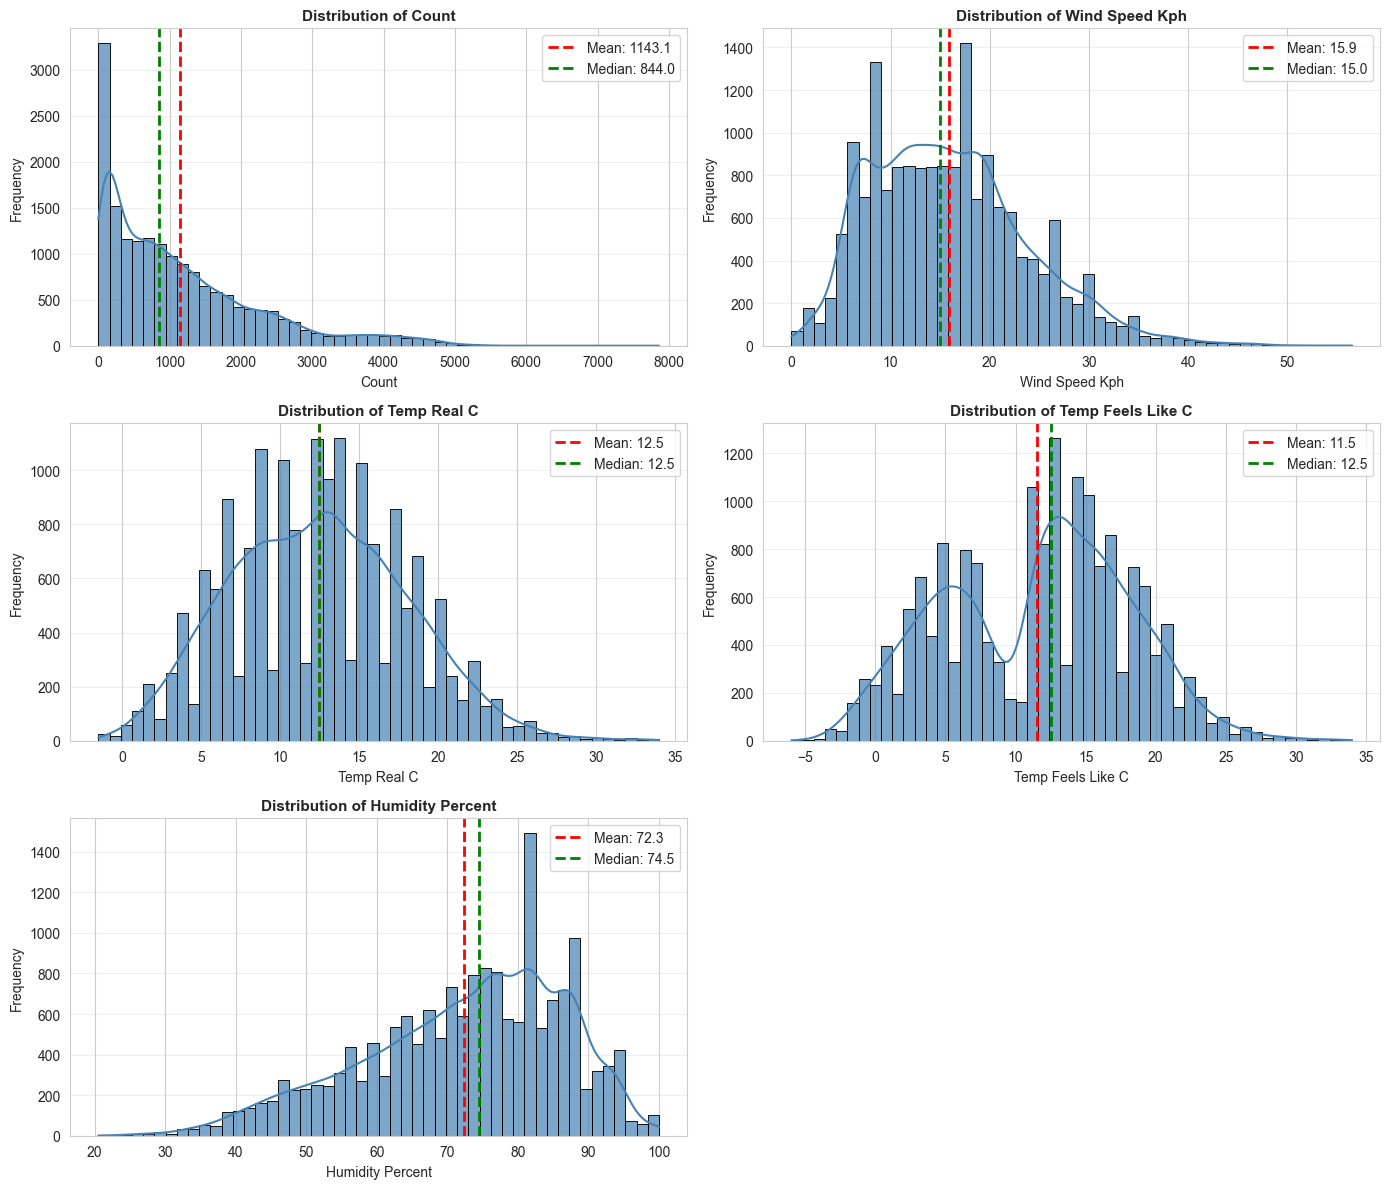

In [17]:
col_names = ['count', 'wind_speed_kph', 
            'temp_real_C', 'temp_feels_like_C',
             'humidity_percent']

fig, axes = plt.subplots(3, 2, figsize=(14, 12)) 
axes = axes.ravel() 
 
# Histogram Graphs
for idx, col in enumerate(col_names): 
    sns.histplot(data=bikes, x=col, bins=50, kde=True, color='steelblue', 
                 edgecolor='black', alpha=0.7, ax=axes[idx])
    
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}', 
                        fontsize=11, fontweight='bold') 
    axes[idx].set_xlabel(col.replace('_', ' ').title()) 
    axes[idx].set_ylabel('Frequency') 
    axes[idx].grid(axis='y', alpha=0.3) 
     
    # Add mean and median lines 
    mean_val = bikes[col].mean() 
    median_val = bikes[col].median() 
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_val:.1f}') 
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, 
                      label=f'Median: {median_val:.1f}') 
    axes[idx].legend() 
 
# Remove extra subplot 
fig.delaxes(axes[5]) 
 
plt.tight_layout() 
plt.show()

### Analysis of Distribution Shape

The histograms visualize the **distribution shape** of each numerical variable. 
They allow us to observe:

- The overall shape of the distribution  
- The direction and magnitude of skewness  
- Where the majority of observations are concentrated  
- The presence of potential outliers  

Understanding these characteristics helps explain variability in the data and prepares it for further modeling.

---

#### 1. Count

The histogram of **count** shows a pronounced peak on the far left side of the graph, indicating that most hourly observations have relatively low demand. 

The distribution is **strongly right-skewed**, with a long tail extending toward values near 8000. This long right tail suggests the presence of rare but extreme high-demand events, likely caused by special circumstances such as holidays, weather changes, or major public events.

This skew indicates:

- Most hours experience low-to-moderate demand  
- A small number of hours experience exceptionally high demand  
- The mean is likely greater than the median due to these extreme values  

---

#### 2. Wind Speed

The **wind speed** histogram shows a slight right skew, with a mild right tail. 

This indicates:

- Most wind speeds cluster around lower-to-moderate values  
- Higher wind speeds occur less frequently  
- There are no extreme outliers, but variability increases gradually  

The distribution suggests relatively stable wind conditions with occasional stronger gusts.

---

#### 3. Actual Temperature (°C)

The histogram of **actual temperature** fluctuates across bins but stabilizes when viewed with the KDE line. 

Although the raw bar heights vary, the smoothed distribution appears approximately normal, indicating:
- Temperatures are generally centered around a stable mean  
- There are no extreme distortions or heavy skew  
- Seasonal and weather variation likely contributes to moderate dispersion  

---

#### 4. Feels-Like Temperature (°C)

The **feels-like temperature** variable exhibits a **bimodal distribution**, meaning it has two distinct peaks:
- A smaller peak around **5°C**
- A larger peak around **15°C**

This pattern may reflect seasonal transitions (e.g., colder and warmer periods of the year).

Both temperature peaks display relatively symmetric spreads with a slight right tail. The KDE curve smooths the fluctuations between bins and reveals an approximately normal overall pattern when aggregated.

This suggests:
- The dataset likely includes data from multiple seasons  
- There are two dominant climate ranges  
- Extreme high temperatures are less frequent  

---

#### 5. Humidity (%)

The **humidity** histogram shows a **left-skewed distribution** (mean < median), with a long tail extending toward lower humidity values.

There is a prominent concentration of observations between **80–85% humidity**, suggesting that high-humidity conditions occur frequently in this dataset.

This implies:
- Most recorded hours are relatively humid  
- Extremely dry conditions are rare  
- The small number of low-humidity observations pulls the mean downward  

The heavy clustering at higher humidity levels may indicate a climate with frequent moisture or seasonal rainfall patterns.

---

#### Summary of Distribution Shapes

| Variable | Shape | Skew | Insight |
|-----------|--------|--------|------------|
| Count | Right-skewed | Positive | Rare extreme high-demand events |
| Wind Speed | Slight right skew | Positive | Mostly stable wind conditions |
| Feels Temp | Bimodal | Slight positive | Seasonal temperature patterns |
| Real Temp | Approximately normal | Minimal | Stable central tendency |
| Humidity | Left-skewed | Negative | Mostly high-humidity environment |

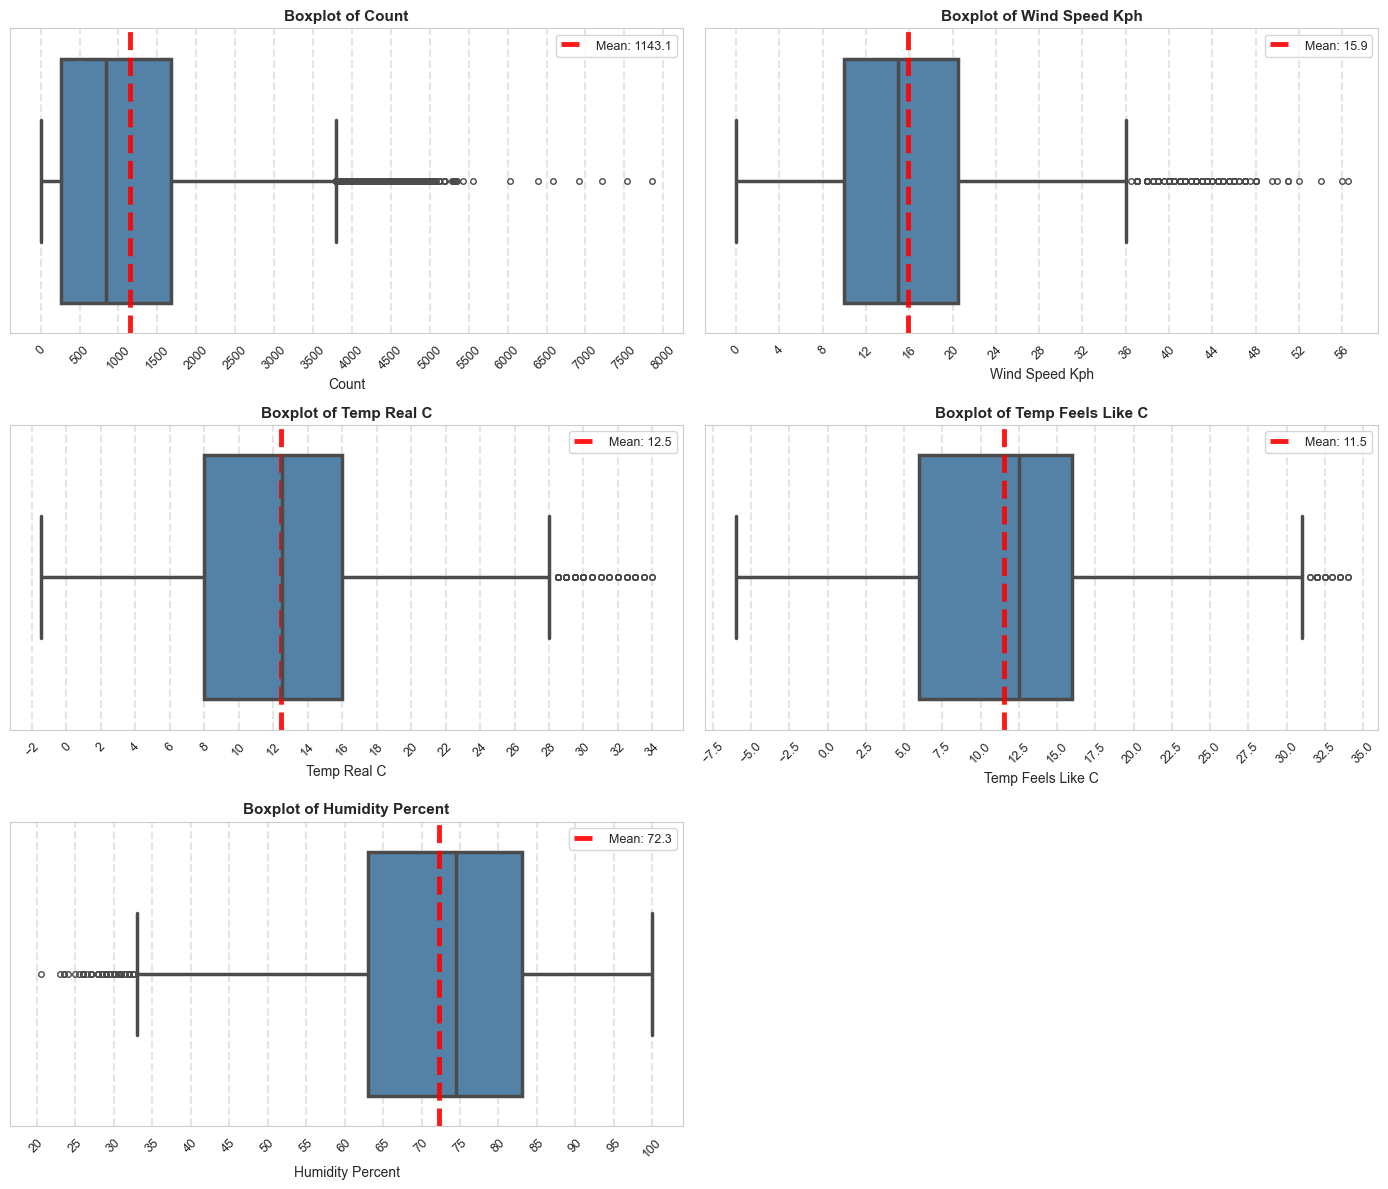

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, col in enumerate(col_names):
    # Create boxplot with much thicker lines
    sns.boxplot(data=bikes, x=col, color='steelblue', ax=axes[idx],
                linewidth=2.5, fliersize=4)
    
    axes[idx].set_title(f'Boxplot of {col.replace("_", " ").title()}',
                        fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
    
    # Add more visible grid lines
    axes[idx].grid(axis='x', alpha=0.5, linestyle='--', linewidth=1.5)
    
    # Increase number of x-axis ticks
    axes[idx].xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
    
    # Make tick labels more readable by rotating
    axes[idx].tick_params(axis='x', labelsize=9, rotation=45)
    
    # Add mean line
    mean_val = bikes[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=3.5,
                      label=f'Mean: {mean_val:.1f}', alpha=0.9)
    
    axes[idx].legend(loc='upper right', fontsize=9)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## Boxplot Analysis

Boxplots provide a clear visual summary of **data range**, **spread**, and areas where values are more concentrated. They are useful for identifying **outliers** and understanding where the bulk of observations lie.  

---

## Bike Share Count

- The majority of bike share counts are **below 2000**.  
- **Outliers** appear around **5500** and above, indicating rare high-demand hours.  
- This visualization highlights that **extreme demand events are uncommon**, while most hours experience moderate counts.

---

## Wind Speed

- Most observations lie between **10–20 kph**.  
- Wind speeds above **36 kph** are considered **outliers**.  
- The boxplot clearly shows that **strong winds are rare**, while moderate wind speeds dominate.

---

## Temperature

### Real Temperature

- Bulk of observations: **8–16°C**  
- Outliers: temperatures above **28°C**  
- Range: **-2°C to 24°C**  
- High humidity may increase heat extremes, while wind can lower perceived temperatures.

### Feels-Like Temperature

- Bulk of observations: **6–16°C**  
- Outliers: above **30°C**  
- Wider range: **-7.5°C to 35°C**, compared to real temperature  
- Indicates that perceived temperatures are more variable, affected by wind chill and other factors.

---

## Humidity

- Most observations lie between **60–85%** humidity.  
- Low humidity values (**<35%**) are considered **outliers**.  
- The boxplot shows that **high humidity is common**, while dry conditions are rare.

### Boxplot Insights Summary

| Variable            | Bulk of Data          | Outliers Start At  | Range (Approx)         | Notes / Observations |
|--------------------|---------------------|-----------------|-----------------------|--------------------|
| Bike Share Count    | < 2000              | 5500             | 0 – 8000             | Extreme high-demand events are rare |
| Wind Speed (kph)    | 10 – 20             | 36               | 5 – 40               | Strong winds are uncommon |
| Real Temperature (°C)| 8 – 16              | 28               | -2 – 24              | Range affected by humidity and wind |
| Feels-Like Temp (°C)| 6 – 16              | 30               | -7.5 – 35            | Wider range due to perception effects (wind, humidity) |
| Humidity (%)        | 60 – 85             | < 35             | 20 – 90              | Low humidity is rare; high humidity common |


### 4.3 Categorical Variables Analysis

In [19]:
# Analyze categorical variables
categorical_cols = ['season', 'weather', 'is_holiday', 'is_weekend', 'day_name']

print("Categorical Variables Summary:")
print("=" * 50)

for col in categorical_cols:
    print(f"\n{col.upper().replace('_', ' ')}:")
    value_counts = bikes[col].value_counts()
    value_percent = (value_counts / len(bikes) * 100).round(2)
    
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percent
    })
    print(summary)

Categorical Variables Summary:

SEASON:
        Count  Percentage
season                   
Spring   4394       25.23
Summer   4387       25.19
Winter   4330       24.87
Fall     4303       24.71

WEATHER:
                        Count  Percentage
weather                                  
Clear                    6150       35.32
Scattered Clouds         4034       23.17
Broken Clouds            3551       20.39
Rain                     2141       12.29
Cloudy                   1464        8.41
Snowfall                   60        0.34
Rain with Thunderstorm     14        0.08

IS HOLIDAY:
            Count  Percentage
is_holiday                   
0.0         17030       97.79
1.0           384        2.21

IS WEEKEND:
            Count  Percentage
is_weekend                   
0.0         12444       71.46
1.0          4970       28.54

DAY NAME:
           Count  Percentage
day_name                    
Monday      2508       14.40
Sunday      2505       14.38
Tuesday     2505       

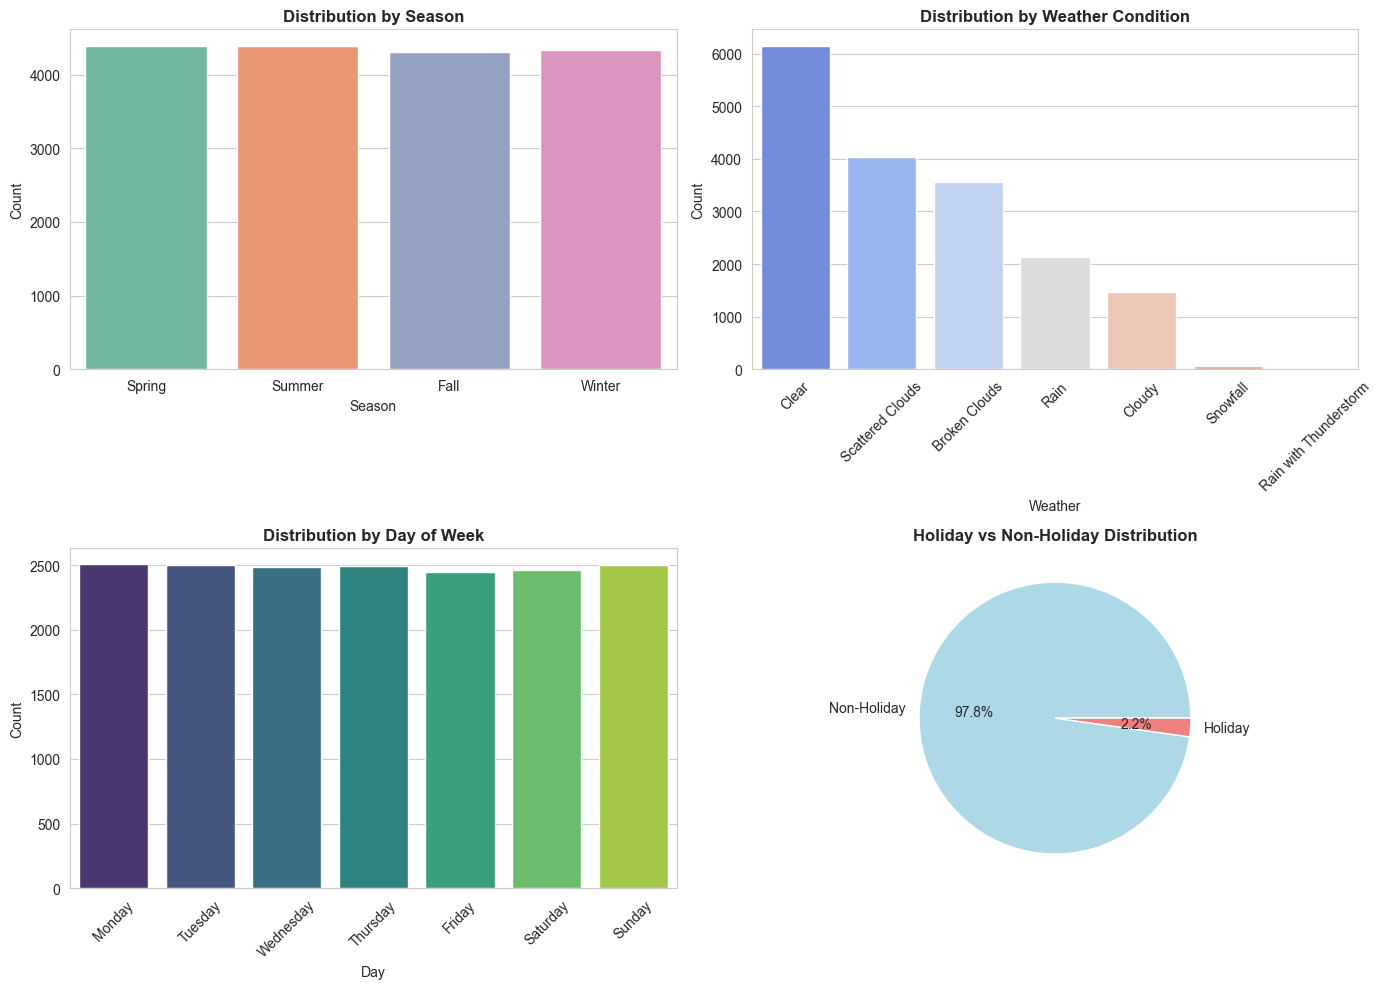

In [20]:
# Visualize categorical distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Season distribution
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
sns.countplot(data=bikes, x='season', order=season_order, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution by Season', fontweight='bold')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Count')

# Weather distribution
weather_counts = bikes['weather'].value_counts()
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm', ax=axes[1])
axes[1].set_title('Distribution by Weather Condition', fontweight='bold')
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Day of week distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=bikes, x='day_name', order=day_order, palette='viridis', ax=axes[2])
axes[2].set_title('Distribution by Day of Week', fontweight='bold')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

# Holiday vs Non-holiday
holiday_data = bikes['is_holiday'].value_counts()
axes[3].pie(holiday_data.values, labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[3].set_title('Holiday vs Non-Holiday Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

---

## 5. Temporal Analysis

### 5.1 Time Series Overview

All-Time Bike Share Statistics:
  Mean hourly rentals :    1143.10
  Median              :     844.00
  Std Dev             :    1085.11
  Min                 :       0.00
  Max                 :    7860.00

  Highest observation : 7860 bikes  @ 2015-07-09 17:00:00
  Lowest  observation : 0 bikes  @ 2015-03-29 01:00:00


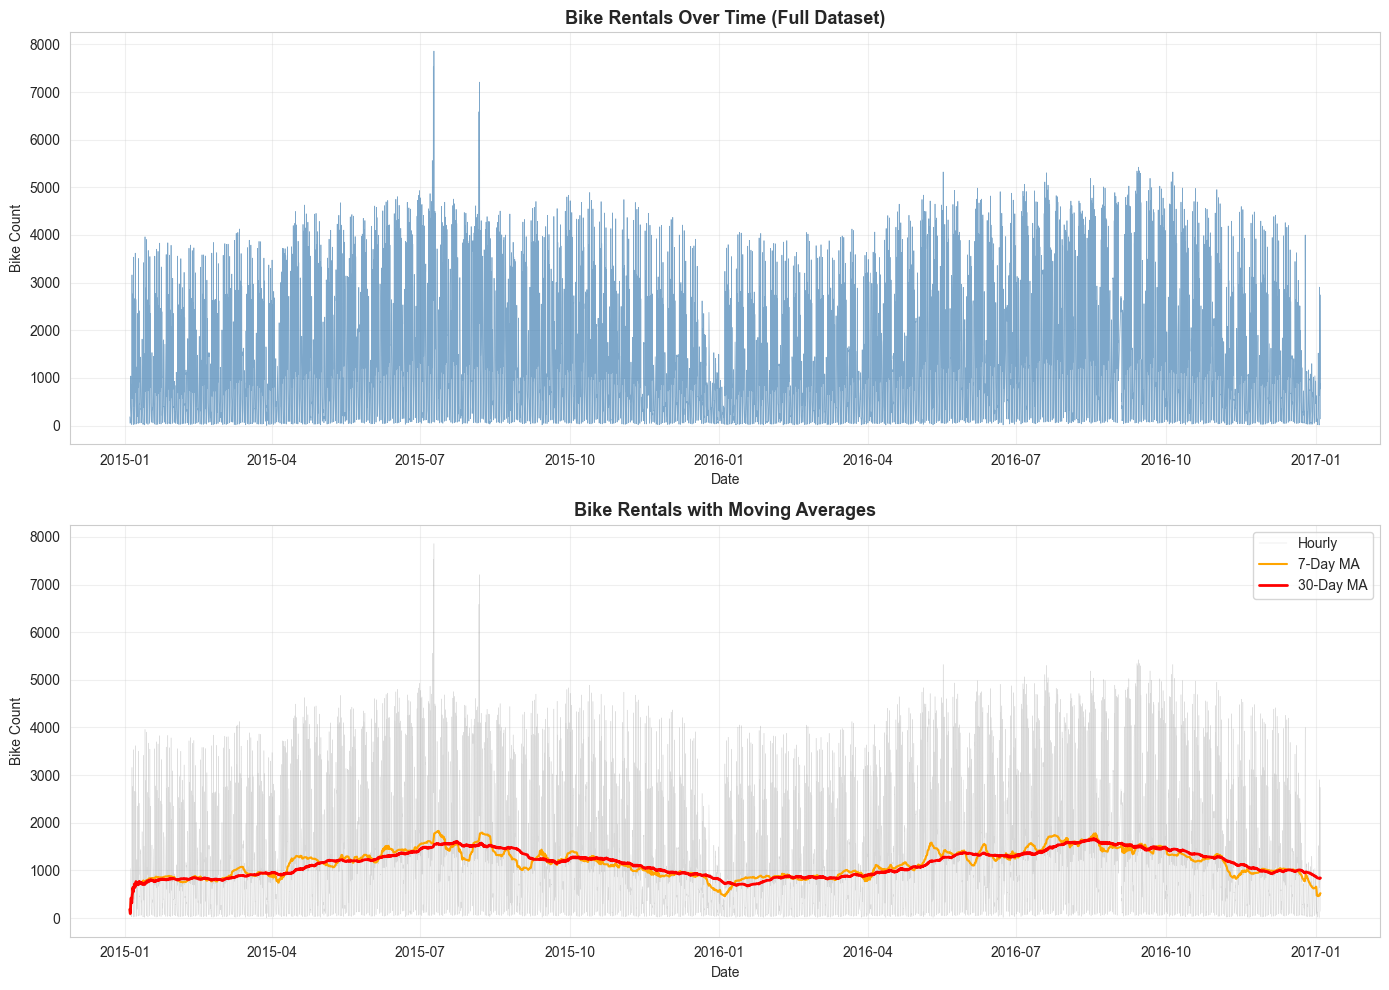

In [21]:
# ── All-Time Overview ──────────────────────────────────────────────────────
print("All-Time Bike Share Statistics:")
print("=" * 60)
overall = bikes['count'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print(f"  Mean hourly rentals : {overall['mean']:>10.2f}")
print(f"  Median              : {overall['median']:>10.2f}")
print(f"  Std Dev             : {overall['std']:>10.2f}")
print(f"  Min                 : {overall['min']:>10.2f}")
print(f"  Max                 : {overall['max']:>10.2f}")

# Highest / Lowest single observation
peak_idx  = bikes['count'].idxmax()
trough_idx = bikes['count'].idxmin()
print(f"\n  Highest observation : {bikes.loc[peak_idx, 'count']} bikes  "
      f"@ {bikes.loc[peak_idx, 'time']}")
print(f"  Lowest  observation : {bikes.loc[trough_idx, 'count']} bikes  "
      f"@ {bikes.loc[trough_idx, 'time']}")
print("=" * 60)

# ── Time-series plots ──────────────────────────────────────────────────────
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(bikes['time'], bikes['count'], linewidth=0.5, alpha=0.7, color='steelblue')
axes[0].set_title('Bike Rentals Over Time (Full Dataset)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Bike Count')
axes[0].grid(alpha=0.3)

bikes['count_ma_7d']  = bikes['count'].rolling(window=7*24,  min_periods=1).mean()
bikes['count_ma_30d'] = bikes['count'].rolling(window=30*24, min_periods=1).mean()

axes[1].plot(bikes['time'], bikes['count'],        linewidth=0.3, alpha=0.3, color='gray',   label='Hourly')
axes[1].plot(bikes['time'], bikes['count_ma_7d'],  linewidth=1.5, color='orange', label='7-Day MA')
axes[1].plot(bikes['time'], bikes['count_ma_30d'], linewidth=2,   color='red',    label='30-Day MA')
axes[1].set_title('Bike Rentals with Moving Averages', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Bike Count')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Overall, the visualization of bike shares throughout the entire year is relatively stable when looking at the 30 day moving averages. However, the raw data has several spikes, and the 7 day moving average changes more frequently, but in a cycle. This could possibly be due to some days of the week being prefered more than others.

### 5.2 Average Bike Shares by Year

Average Bike Shares by Year:
         Mean  Median      Std  Min   Max     Total
year                                               
2015  1126.78   832.0  1063.96    0  7860   9738746
2016  1164.45   862.0  1107.05    9  5422  10129546
2017   523.33   257.5   608.75   10  2904     37680


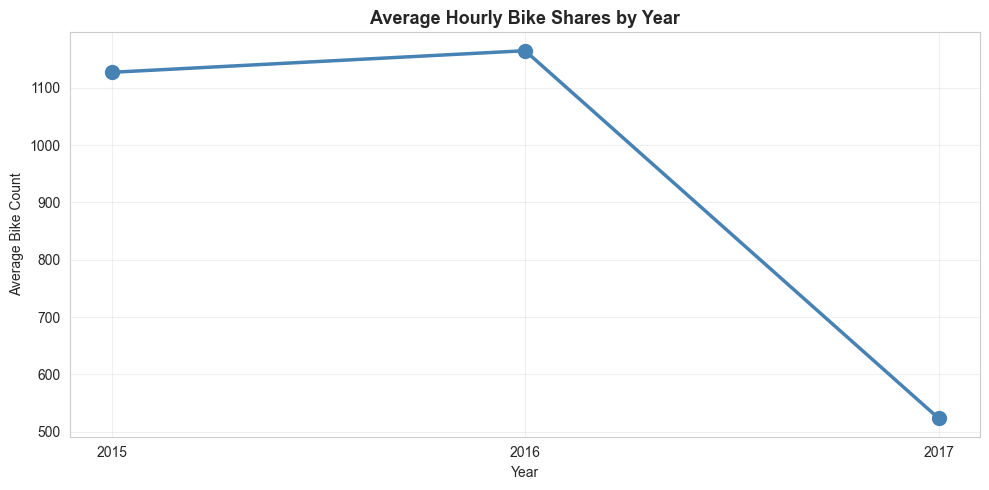

In [43]:
# Average bike shares by year
year_stats = bikes.groupby('year')['count'].agg([
    ('Mean',   'mean'),
    ('Median', 'median'),
    ('Std',    'std'),
    ('Min',    'min'),
    ('Max',    'max'),
    ('Total',  'sum')
]).round(2)

print("Average Bike Shares by Year:")
print("=" * 60)
print(year_stats.to_string())
print("=" * 60)

fig, ax = plt.subplots(figsize=(10, 5))

years = year_stats.index.astype(str)
ax.plot(years, year_stats['Mean'], marker='o', linewidth=2.5,
        markersize=10, color='steelblue')
ax.set_title('Average Hourly Bike Shares by Year', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Average Bike Count')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


2016 shows the highest average hourly demand and accounts for the largest share of total rentals,
reflecting a full calendar year of data. The 2015 mean is slightly lower, possibly capturing early
adoption effects. The 2017 figure is not representative — the dataset ends in early January 2017
and covers only a handful of days.

---

### 5.3 Average Bike Shares by Month

Average Bike Shares by Month:
               Mean  Median      Std  Min   Max
month_name                                     
January      784.69   566.0   803.38   10  4054
February     836.28   662.0   813.57   12  4051
March        921.29   712.0   880.87    0  4125
April       1112.95   851.0  1048.52   11  4646
May         1275.10   999.0  1139.71   13  5322
June        1383.35  1160.0  1175.01   12  4984
July        1543.70  1303.0  1299.84   32  7860
August      1463.12  1201.5  1266.93   30  7208
September   1356.60  1067.0  1210.87   14  5422
October     1217.55   986.0  1086.10   24  5322
November     965.87   723.5   941.74    9  4951
December     845.52   668.0   805.09   22  4415

  Peak month : July  (1544 avg)
  Low  month : January  (785 avg)


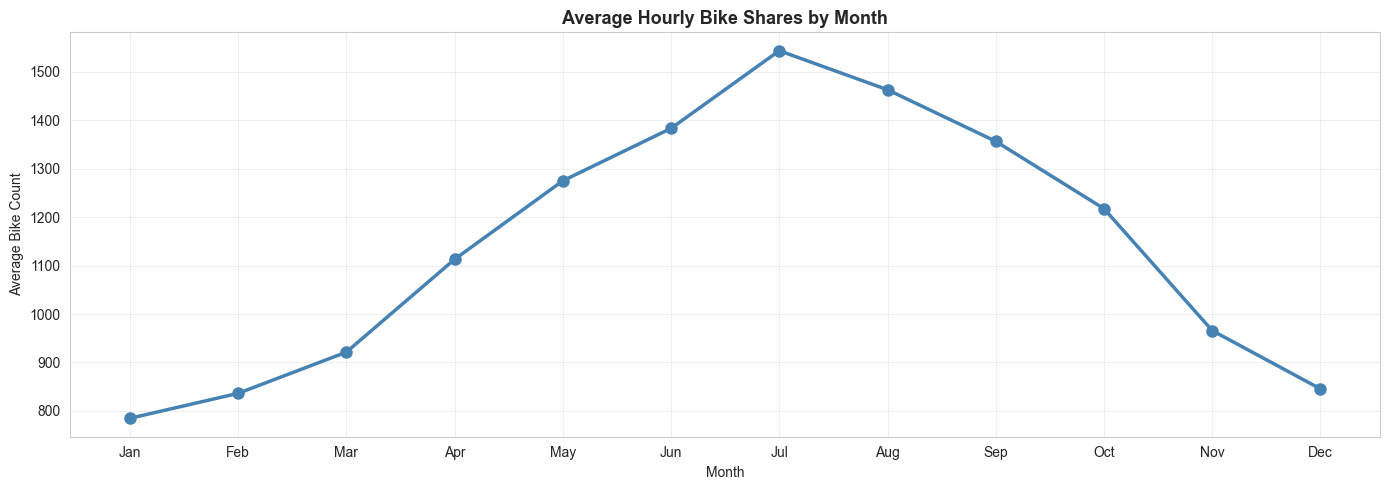

In [23]:
# Average bike shares by month
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

monthly_stats = bikes.groupby('month_name')['count'].agg([
    ('Mean',   'mean'),
    ('Median', 'median'),
    ('Std',    'std'),
    ('Min',    'min'),
    ('Max',    'max')
]).round(2).reindex(month_order)

print("Average Bike Shares by Month:")
print("=" * 60)
print(monthly_stats.to_string())
print("=" * 60)

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(range(len(month_order)), monthly_stats['Mean'],
        marker='o', linewidth=2.5, markersize=8, color='steelblue')
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels([m[:3] for m in month_order])
ax.set_title('Average Hourly Bike Shares by Month', fontsize=13, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Average Bike Count')
ax.grid(alpha=0.3)

peak_m = monthly_stats['Mean'].idxmax()
low_m  = monthly_stats['Mean'].idxmin()
print(f"\n  Peak month : {peak_m}  ({monthly_stats.loc[peak_m, 'Mean']:.0f} avg)")
print(f"  Low  month : {low_m}  ({monthly_stats.loc[low_m,  'Mean']:.0f} avg)")

plt.tight_layout()
plt.show()


Demand peaks in summer (June–August) and reaches its lowest point in winter months (December–February),
reflecting the strong influence of temperature and daylight hours on ridership.

---

### 5.4 Average Bike Shares by Day of Month

Average Bike Shares by Day of Month:
        Mean  Median      Std  Min   Max
day                                     
1    1077.46   765.0  1058.51   14  4951
2    1088.12   785.5  1047.74   18  4783
3    1127.60   807.0  1083.32   10  4742
4    1144.49   852.0  1081.55   22  5117
5    1140.77   839.0  1074.08   22  5322
6    1211.23   835.0  1218.41   17  7208
7    1194.15   838.0  1151.28   17  4984
8    1222.70   955.5  1130.11   20  5560
9    1261.26   921.0  1225.25   12  7860
10   1157.45   861.0  1076.18   14  4702
11   1203.62   896.0  1106.52   13  4986
12   1166.95   826.0  1096.00   11  4926
13   1139.22   826.0  1098.13   13  5342
14   1123.67   772.0  1103.63   14  5422
15   1175.63   872.0  1115.05   18  5295
16   1140.87   880.5  1060.76   12  4775
17   1182.31   932.0  1075.61   25  5322
18   1178.55   898.5  1067.83   23  5112
19   1153.15   858.0  1075.29   17  5304
20   1115.67   820.0  1072.77   18  5046
21   1125.73   839.5  1069.53    9  5188
22   1127.72   855.0

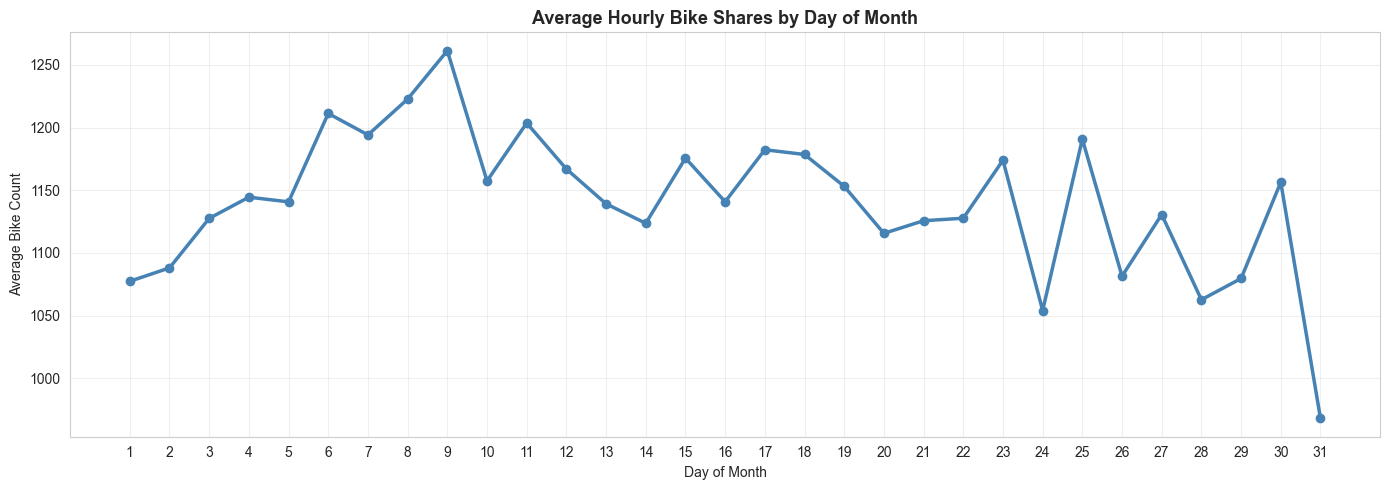

In [24]:
# Average bike shares by day of month
dom_stats = bikes.groupby('day')['count'].agg([
    ('Mean',   'mean'),
    ('Median', 'median'),
    ('Std',    'std'),
    ('Min',    'min'),
    ('Max',    'max')
]).round(2)

print("Average Bike Shares by Day of Month:")
print("=" * 60)
print(dom_stats.to_string())
print("=" * 60)

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(dom_stats.index, dom_stats['Mean'],
        marker='o', linewidth=2.5, markersize=6, color='steelblue')
ax.set_title('Average Hourly Bike Shares by Day of Month', fontsize=13, fontweight='bold')
ax.set_xlabel('Day of Month')
ax.set_ylabel('Average Bike Count')
ax.set_xticks(dom_stats.index)
ax.grid(alpha=0.3)

peak_d = dom_stats['Mean'].idxmax()
low_d  = dom_stats['Mean'].idxmin()
print(f"\n  Peak day of month : {peak_d}  ({dom_stats.loc[peak_d, 'Mean']:.0f} avg)")
print(f"  Low  day of month : {low_d}  ({dom_stats.loc[low_d,  'Mean']:.0f} avg)")

plt.tight_layout()
plt.show()


No strong systematic pattern emerges across individual days of the month — fluctuations are largely noise
driven by which day of the week each calendar date falls on across the two-year dataset. Day of the week analysis should provide more context for the patterns.

---

### 5.5 Average Bike Shares by Day of Week

Average Bike Shares by Day of Week:
              Mean  Median      Std  Min   Max    Total
day_name                                               
Monday     1130.27   828.0  1104.30    9  5186  2834719
Tuesday    1230.11   931.0  1176.55   10  5342  3081414
Wednesday  1244.41   958.0  1169.08   13  5560  3097334
Thursday   1258.81   984.0  1185.87   12  7860  3136956
Friday     1182.77   976.5  1031.17   15  4596  2897793
Saturday    995.55   668.0   915.27   42  4214  2454040
Sunday      959.57   580.0   934.72    0  4341  2403716

  Peak day : Thursday  (1259 avg)
  Low  day : Sunday  (960 avg)

Weekday vs Weekend:
            mean  median      std
Weekday  1209.27   927.0  1136.04
Weekend   977.42   619.0   925.21


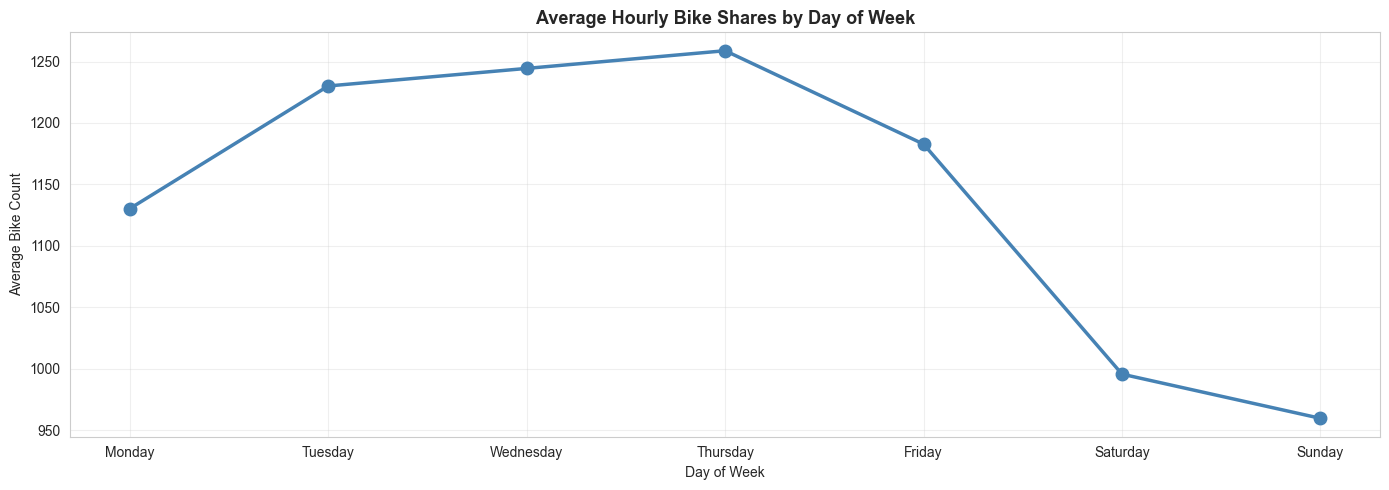

In [25]:
# Average bike shares by day of week
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

dow_stats = bikes.groupby('day_name')['count'].agg([
    ('Mean',   'mean'),
    ('Median', 'median'),
    ('Std',    'std'),
    ('Min',    'min'),
    ('Max',    'max'),
    ('Total',  'sum')
]).round(2).reindex(day_order)

print("Average Bike Shares by Day of Week:")
print("=" * 60)
print(dow_stats.to_string())
print("=" * 60)

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(range(len(day_order)), dow_stats['Mean'],
        marker='o', linewidth=2.5, markersize=9, color='steelblue')
ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)
ax.set_title('Average Hourly Bike Shares by Day of Week', fontsize=13, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Bike Count')
ax.grid(alpha=0.3)

peak_day_name = dow_stats['Mean'].idxmax()
low_day_name  = dow_stats['Mean'].idxmin()
print(f"\n  Peak day : {peak_day_name}  ({dow_stats.loc[peak_day_name, 'Mean']:.0f} avg)")
print(f"  Low  day : {low_day_name}  ({dow_stats.loc[low_day_name, 'Mean']:.0f} avg)")

# Weekday vs Weekend
weekday_weekend = bikes.groupby('is_weekend')['count'].agg(['mean','median','std']).round(2)
weekday_weekend.index = ['Weekday','Weekend']
print("\nWeekday vs Weekend:")
print(weekday_weekend.to_string())

plt.tight_layout()
plt.show()


Weekdays consistently see higher average demand than weekends, likely driven by commuter traffic during morning
and evening rush hours. Friday often shows the highest weekday demand, while Sunday tends to record
the lowest overall average.

---

### 5.6 Average Bike Shares by Hour of Day

Average Bike Shares by Hour of Day:
         Mean  Median      Std  Min   Max
hour                                     
0      290.61   239.0   181.67   29   982
1      200.63   150.0   154.48    0   932
2      136.30    94.0   111.71   12   684
3       94.25    61.0    81.04    9   510
4       73.31    58.0    46.31   15   286
5      110.71   110.0    34.95   14   351
6      466.63   544.5   267.47   21  1758
7     1468.75  1804.5   933.29   47  5309
8     2882.82  3684.0  1778.30   65  7531
9     1653.02  1849.0   697.72  161  4832
10    1064.66  1050.0   330.14  163  2760
11    1151.22  1071.0   500.19  168  3027
12    1433.72  1342.0   608.05  241  3728
13    1505.74  1388.0   694.54  150  4341
14    1472.00  1324.5   735.92  132  4214
15    1564.62  1402.0   742.49  167  4181
16    1869.80  1776.5   726.95  148  6033
17    2829.59  2820.5  1158.53  151  7860
18    2629.04  2633.0  1176.86  140  6913
19    1651.51  1604.0   715.80  136  4654
20    1059.78   989.0   471.95  116  315

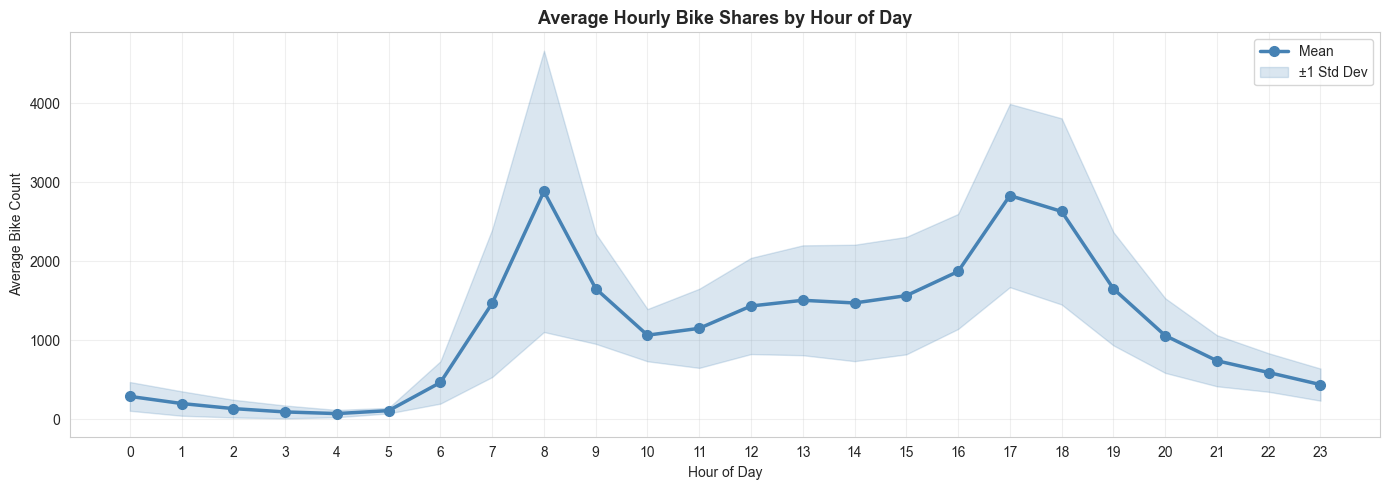

In [26]:
# Average bike shares by hour of day
hourly_stats = bikes.groupby('hour')['count'].agg([
    ('Mean',   'mean'),
    ('Median', 'median'),
    ('Std',    'std'),
    ('Min',    'min'),
    ('Max',    'max')
]).round(2)

print("Average Bike Shares by Hour of Day:")
print("=" * 60)
print(hourly_stats.to_string())
print("=" * 60)

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(hourly_stats.index, hourly_stats['Mean'],
        marker='o', linewidth=2.5, markersize=7, color='steelblue', label='Mean')
ax.fill_between(hourly_stats.index,
                hourly_stats['Mean'] - hourly_stats['Std'],
                hourly_stats['Mean'] + hourly_stats['Std'],
                alpha=0.2, color='steelblue', label='±1 Std Dev')
ax.set_title('Average Hourly Bike Shares by Hour of Day', fontsize=13, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Bike Count')
ax.set_xticks(hourly_stats.index)
ax.grid(alpha=0.3)
ax.legend()

peak_hour  = hourly_stats['Mean'].idxmax()
peak_value = hourly_stats['Mean'].max()
low_hour   = hourly_stats['Mean'].idxmin()
low_value  = hourly_stats['Mean'].min()

print(f"\n  Peak hour : {peak_hour}:00  ({peak_value:.0f} avg)")
print(f"  Low  hour : {low_hour}:00  ({low_value:.0f} avg)")

plt.tight_layout()
plt.show()

## Hourly Bike Share Analysis

### 1. Overnight and Early Morning (0:00 – 5:00)
- Counts are **lowest during late night and early morning hours**.
- Mean ranges from **73 to 291 bikes**, with medians generally lower than means, indicating occasional higher counts (outliers).
- Standard deviation is moderate (35–182), reflecting some variability in early rides.
- Max counts are relatively low, **below 1000**.

### 2. Late Morning (6:00 – 9:00)
- Counts **increase sharply starting at 6:00**, with mean = 467 bikes and median = 545.
- Peaks at **8:00 AM**, mean = 2883 and median = 3684, Std = 1778 → high variability.
- Min = 65, Max = 7531 → some hours experience extremely high bike usage.
- This aligns with **morning commute patterns**, with the hypothesis that most users travel to work or school during these hours.

### 3. Midday (10:00 – 15:00)
- Counts remain **high but slightly lower than the morning peak**, mean ≈ 1065–1565.
- Median is generally close to mean but slightly lower, indicating **right-skewed distributions** with some high-demand outliers.
- Std remains high (≈ 330–743), reflecting fluctuating midday demand.
- Lunch also commonly occurs around this time, possibly being the reason why it is high but lower than the morning peak. Some commute for lunch.

### 4. Late Afternoon / Evening (16:00 – 20:00)
- Counts **increase again during late afternoon**, reflecting the **evening commute**.
- Peaks at **17:00**, mean = 2829, median = 2821, Std = 1159 → highly variable demand.
- Maximum counts exceed 7000 at 17:00 and 18:00 → **extreme outliers**.
- Median close to mean suggests that high demand is more frequent in these hours compared to morning peaks.

### 5. Nighttime (21:00 – 23:00)
- Counts **gradually decrease** toward nighttime, mean ≈ 440–741 bikes.
- Std decreases as well, indicating more **stable low demand**.
- Maximum counts drop below 2200, showing **fewer extreme events** late at night.

---

## Summary of Hourly Patterns

| Hour Range     | Trend / Insight |
|----------------|----------------|
| 0:00 – 5:00    | Very low demand; most hours < 300 bikes; occasional outliers |
| 6:00 – 9:00    | Sharp morning peak; extreme counts at 8:00; high variability |
| 10:00 – 15:00  | High but slightly lower than morning; skewed with some outliers |
| 16:00 – 20:00  | Evening peak; high counts, extreme outliers, high variability |
| 21:00 – 23:00  | Declining demand; lower variability; max counts below 2200 |

---

**Insights:**

- **Two main peaks** correspond to **commuting hours**: morning (7–9 AM) and evening (16–18 PM).
- **Right-skewed distributions** in most hours indicate occasional high-demand events (outliers).
- **Early morning and late-night hours** show stable, low demand.
- **Late morning** (6:00–9:00) and **late afternoon** (16:00–20:00) show the highest averages. This is likely due to commute experienced at these times. Users need bike shares to and from work, school, and events.
- **Evening peak** has higher extreme counts, even more than late morning, possibly due to leisure or multiple simultaneous events occurring at night that need transportation.
- This pattern suggests that demand is **strongly influenced by human activity cycles and events** (work, school, leisure), typical in urban bike-sharing systems.

---

### 5.7 Temporal Heatmaps

Heatmaps reveal interaction effects between two time dimensions simultaneously, highlighting when
demand is highest or lowest at the intersection of two granularities.

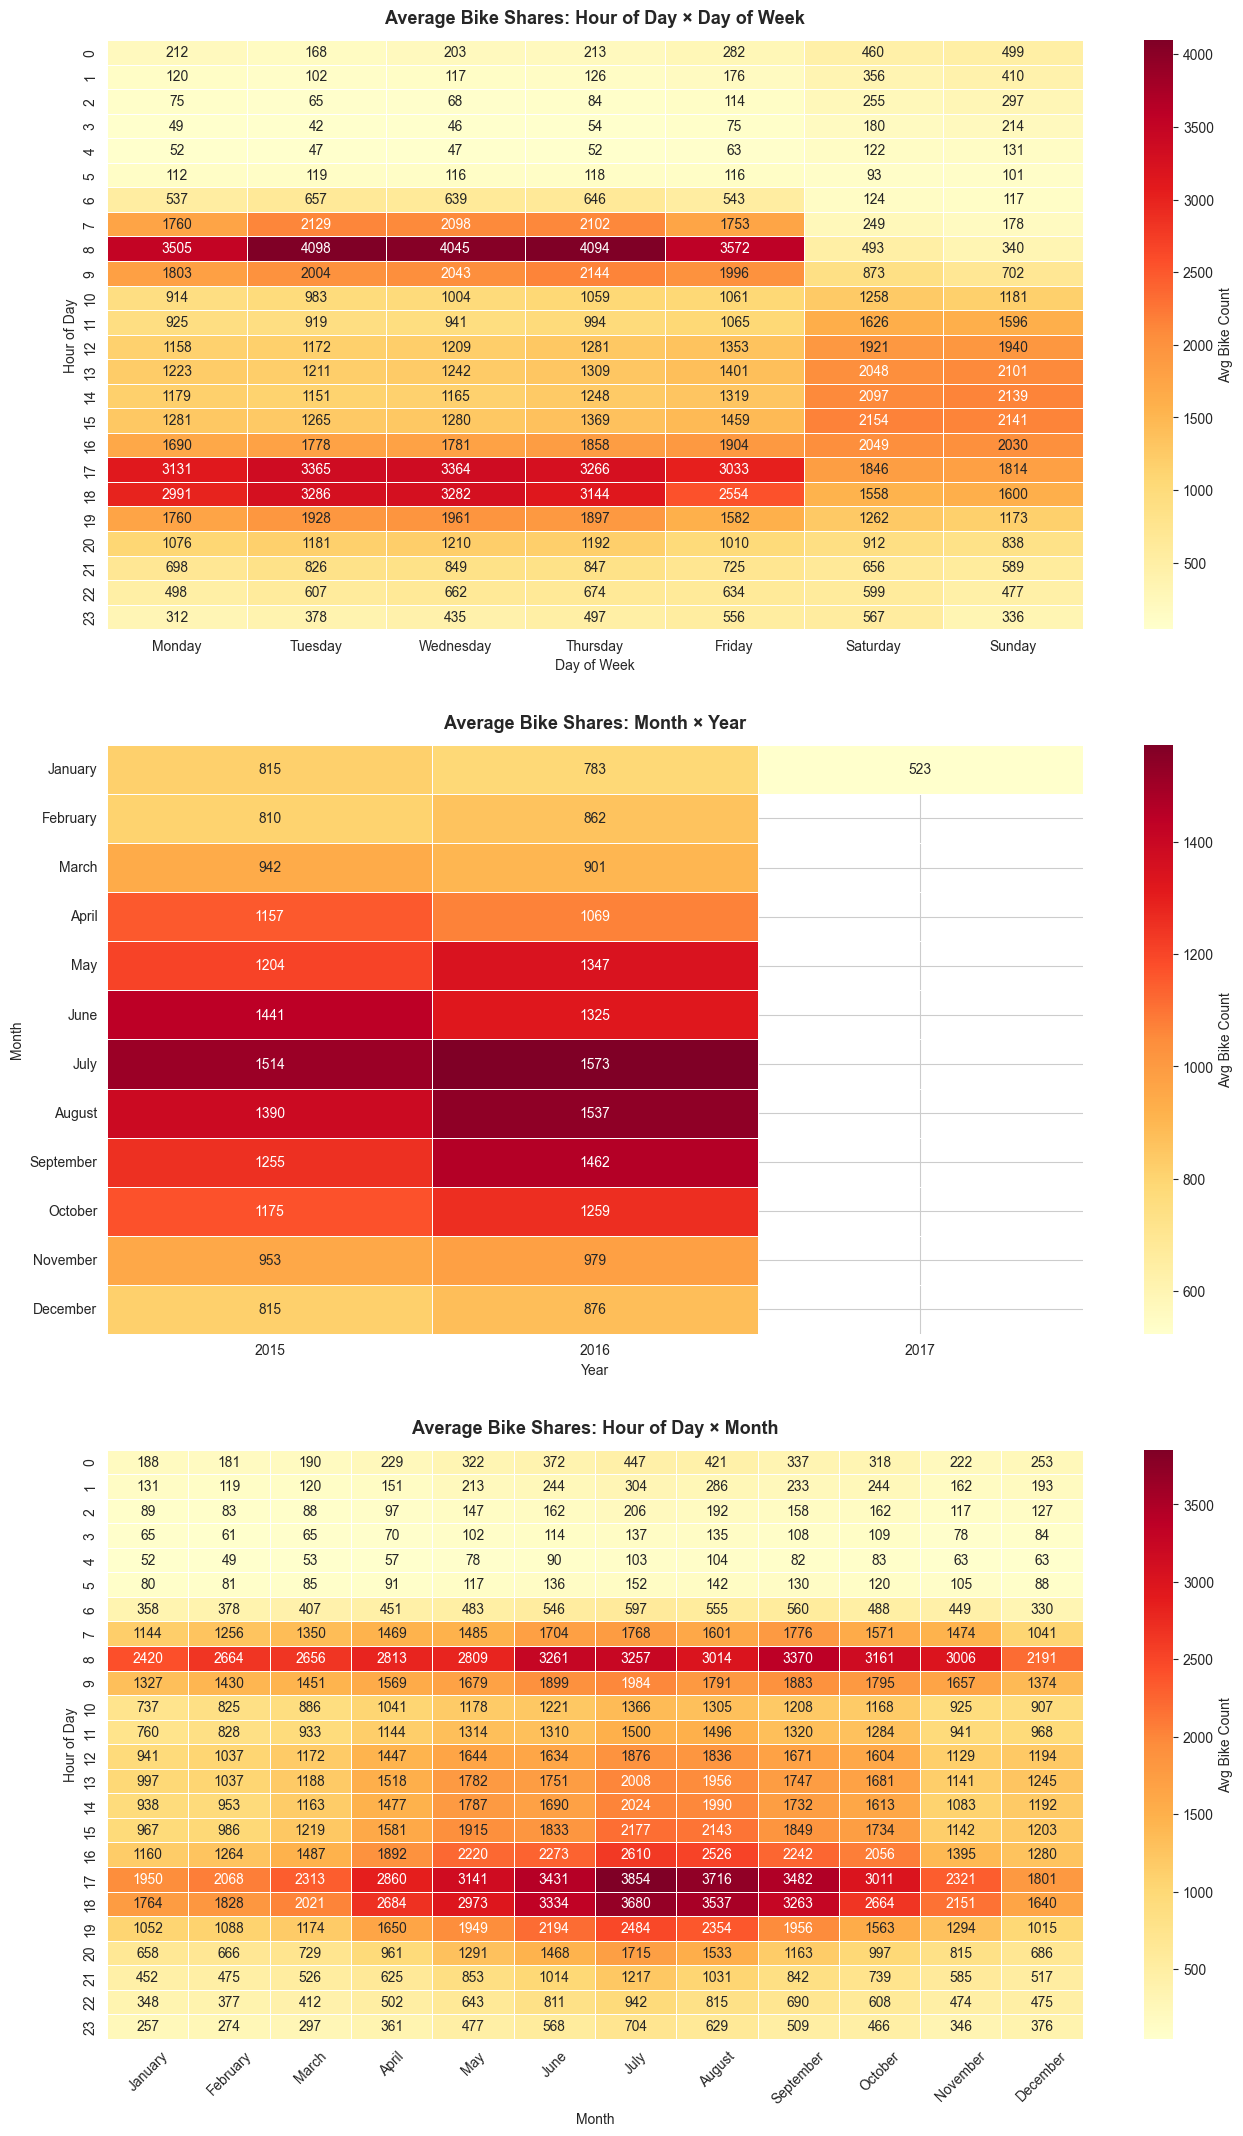

In [27]:
# ── Heatmap 1: Hour × Day of Week ──────────────────────────────────────────
pivot_hour_dow = bikes.pivot_table(
    values='count', index='hour', columns='day_name', aggfunc='mean'
).reindex(columns=day_order).round(0)

# ── Heatmap 2: Month × Year ─────────────────────────────────────────────────
pivot_month_year = bikes.pivot_table(
    values='count', index='month_name', columns='year', aggfunc='mean'
).reindex(index=month_order).round(0)

# ── Heatmap 3: Hour × Month ──────────────────────────────────────────────────
pivot_hour_month = bikes.pivot_table(
    values='count', index='hour', columns='month_name', aggfunc='mean'
).reindex(columns=month_order).round(0)

fig, axes = plt.subplots(3, 1, figsize=(14, 22))

# Heatmap 1
sns.heatmap(pivot_hour_dow, ax=axes[0], cmap='YlOrRd', annot=True, fmt='.0f',
            linewidths=0.4, linecolor='white', cbar_kws={'label': 'Avg Bike Count'})
axes[0].set_title('Average Bike Shares: Hour of Day × Day of Week',
                  fontsize=13, fontweight='bold', pad=12)
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Hour of Day')
axes[0].tick_params(axis='x', rotation=0)

# Heatmap 2
sns.heatmap(pivot_month_year, ax=axes[1], cmap='YlOrRd', annot=True, fmt='.0f',
            linewidths=0.4, linecolor='white', cbar_kws={'label': 'Avg Bike Count'})
axes[1].set_title('Average Bike Shares: Month × Year',
                  fontsize=13, fontweight='bold', pad=12)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Month')
axes[1].tick_params(axis='x', rotation=0)
axes[1].tick_params(axis='y', rotation=0)

# Heatmap 3
sns.heatmap(pivot_hour_month, ax=axes[2], cmap='YlOrRd', annot=True, fmt='.0f',
            linewidths=0.4, linecolor='white', cbar_kws={'label': 'Avg Bike Count'})
axes[2].set_title('Average Bike Shares: Hour of Day × Month',
                  fontsize=13, fontweight='bold', pad=12)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Hour of Day')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3)
plt.show()

**Hour × Day of Week** — The busiest cells cluster at 08:00 and 17:00–18:00 on weekdays, confirming
the commute-driven demand pattern. Weekend mornings start later and lack the sharp peaks seen on
workdays.

**Month × Year** — Summer months (June–August) show the highest averages in both years, while
December–February are the weakest. The cell-by-cell comparison also makes year-over-year growth visible.

**Hour × Month** — Combines both granularities: peak commute hours dominate in summer months,
while winter mornings and nights are uniformly low regardless of time of day.

---

---

## 6. Weather Impact Analysis

### 6.1 Temperature Analysis

Correlation between Real Temperature and Bike Count: 0.389
Correlation between Feels-Like Temperature and Bike Count: 0.369


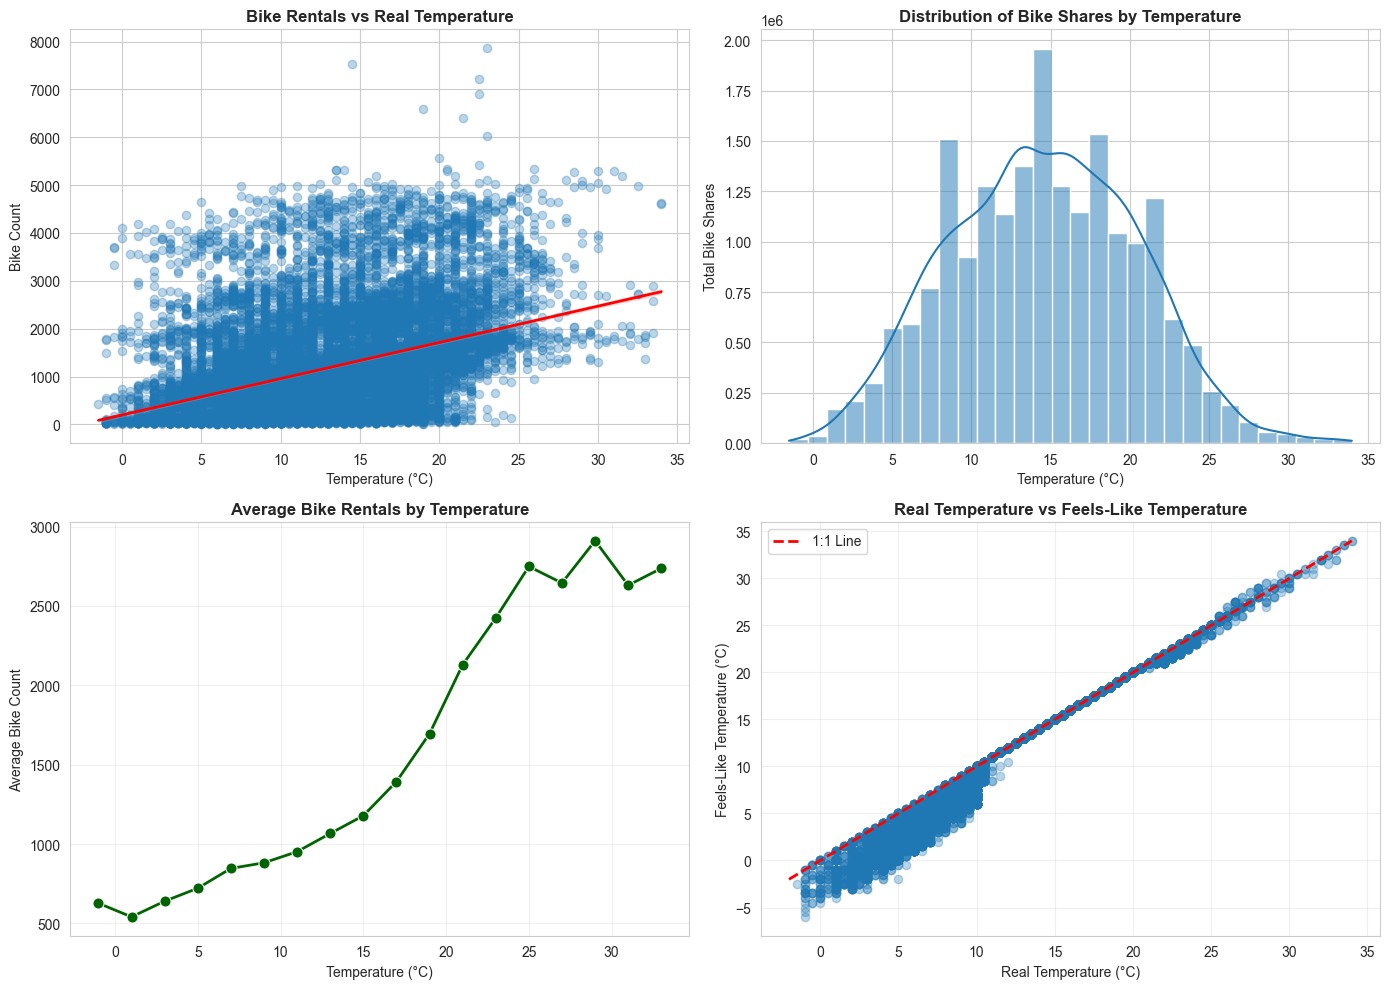


Optimal temperature for bike rentals: ~29.0°C


In [44]:
# Temperature correlation with bike count
temp_corr_real = bikes['temp_real_C'].corr(bikes['count'])
temp_corr_feels = bikes['temp_feels_like_C'].corr(bikes['count'])

print(f"Correlation between Real Temperature and Bike Count: {temp_corr_real:.3f}")
print(f"Correlation between Feels-Like Temperature and Bike Count: {temp_corr_feels:.3f}")

# Create temperature bins and analyze
temp_min = np.floor(bikes['temp_real_C'].min())
temp_max = np.ceil(bikes['temp_real_C'].max())
bins = np.arange(temp_min, temp_max + 2, 2)
bikes['temp_bin'] = pd.cut(bikes['temp_real_C'], bins=bins, include_lowest=True)

temp_avg = bikes.groupby('temp_bin', observed=True)['count'].mean().reset_index()
temp_avg['bin_center'] = temp_avg['temp_bin'].apply(lambda x: x.mid)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot with regression line
sns.regplot(data=bikes, x='temp_real_C', y='count', scatter_kws={'alpha':0.3}, 
            line_kws={'color':'red', 'linewidth':2}, ax=axes[0,0])
axes[0,0].set_title('Bike Rentals vs Real Temperature', fontweight='bold')
axes[0,0].set_xlabel('Temperature (°C)')
axes[0,0].set_ylabel('Bike Count')

# Distribution histogram with average line
sns.histplot(data=bikes, x='temp_real_C', weights='count', bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Bike Shares by Temperature', fontweight='bold')
axes[0,1].set_xlabel('Temperature (°C)')
axes[0,1].set_ylabel('Total Bike Shares')

# Average by temperature bin
sns.lineplot(data=temp_avg, x='bin_center', y='count', marker='o', markersize=8, 
             linewidth=2, color='darkgreen', ax=axes[1,0])
axes[1,0].set_title('Average Bike Rentals by Temperature', fontweight='bold')
axes[1,0].set_xlabel('Temperature (°C)')
axes[1,0].set_ylabel('Average Bike Count')
axes[1,0].grid(alpha=0.3)

# Real vs Feels-Like comparison
axes[1,1].scatter(bikes['temp_real_C'], bikes['temp_feels_like_C'], alpha=0.3)
axes[1,1].plot([temp_min, temp_max], [temp_min, temp_max], 'r--', linewidth=2, label='1:1 Line')
axes[1,1].set_title('Real Temperature vs Feels-Like Temperature', fontweight='bold')
axes[1,1].set_xlabel('Real Temperature (°C)')
axes[1,1].set_ylabel('Feels-Like Temperature (°C)')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Optimal temperature range
optimal_temp = temp_avg.loc[temp_avg['count'].idxmax(), 'bin_center']
print(f"\nOptimal temperature for bike rentals: ~{optimal_temp:.1f}°C")

### 6.2 Humidity Analysis

Correlation between Humidity and Bike Count: -0.463


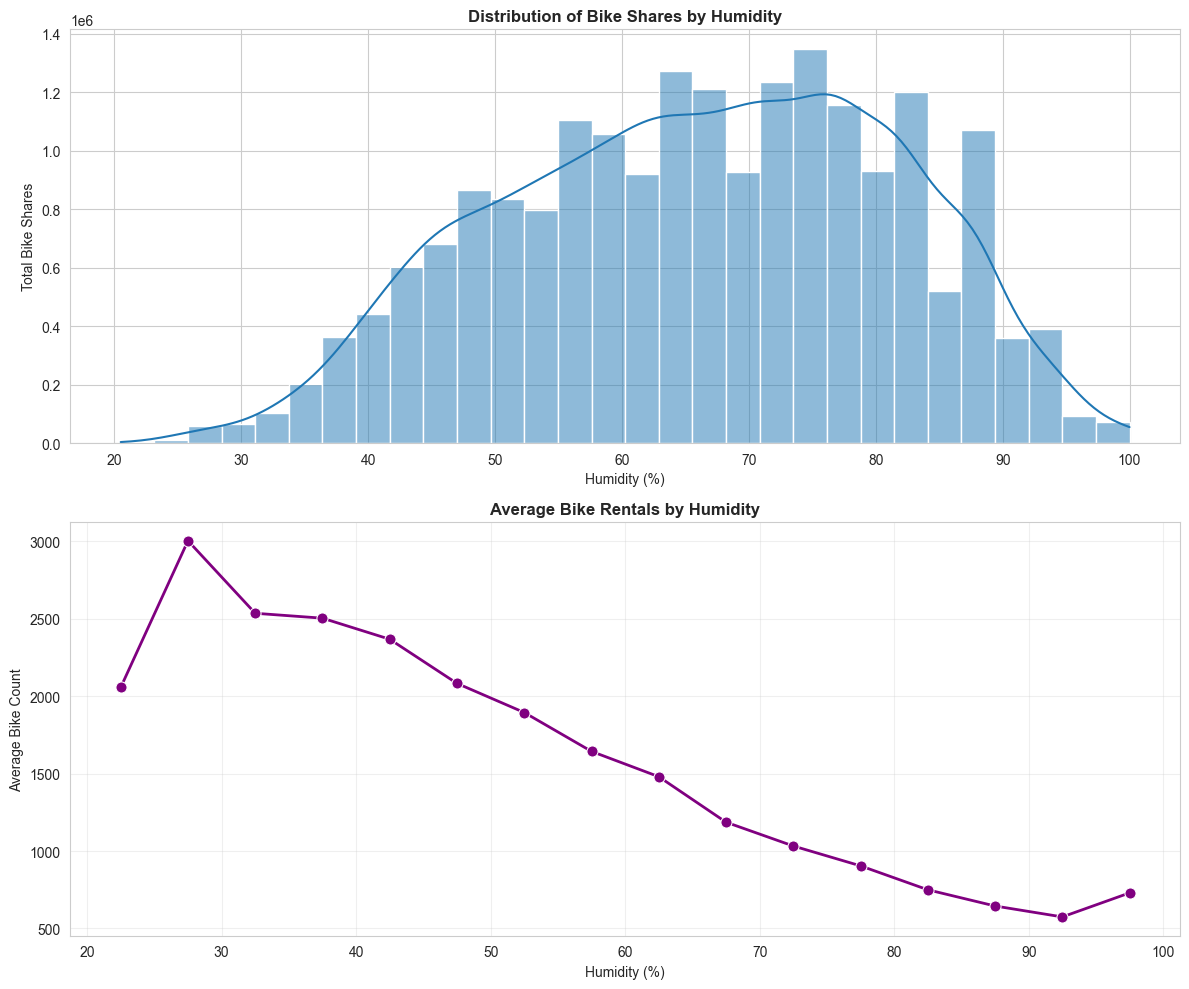

In [29]:
# Humidity analysis
humidity_corr = bikes['humidity_percent'].corr(bikes['count'])
print(f"Correlation between Humidity and Bike Count: {humidity_corr:.3f}")

# Create humidity bins
hum_min = np.floor(bikes['humidity_percent'].min())
hum_max = np.ceil(bikes['humidity_percent'].max())
bins = np.arange(hum_min, hum_max + 5, 5)
bikes['humidity_bin'] = pd.cut(bikes['humidity_percent'], bins=bins, include_lowest=True)

hum_avg = bikes.groupby('humidity_bin', observed=True)['count'].mean().reset_index()
hum_avg['bin_center'] = hum_avg['humidity_bin'].apply(lambda x: x.mid)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Distribution
sns.histplot(data=bikes, x='humidity_percent', weights='count', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Bike Shares by Humidity', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Total Bike Shares')

# Average by humidity
sns.lineplot(data=hum_avg, x='bin_center', y='count', marker='o', markersize=8, 
             linewidth=2, color='purple', ax=axes[1])
axes[1].set_title('Average Bike Rentals by Humidity', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Humidity (%)')
axes[1].set_ylabel('Average Bike Count')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Wind Speed Analysis

Correlation between Wind Speed and Bike Count: 0.116


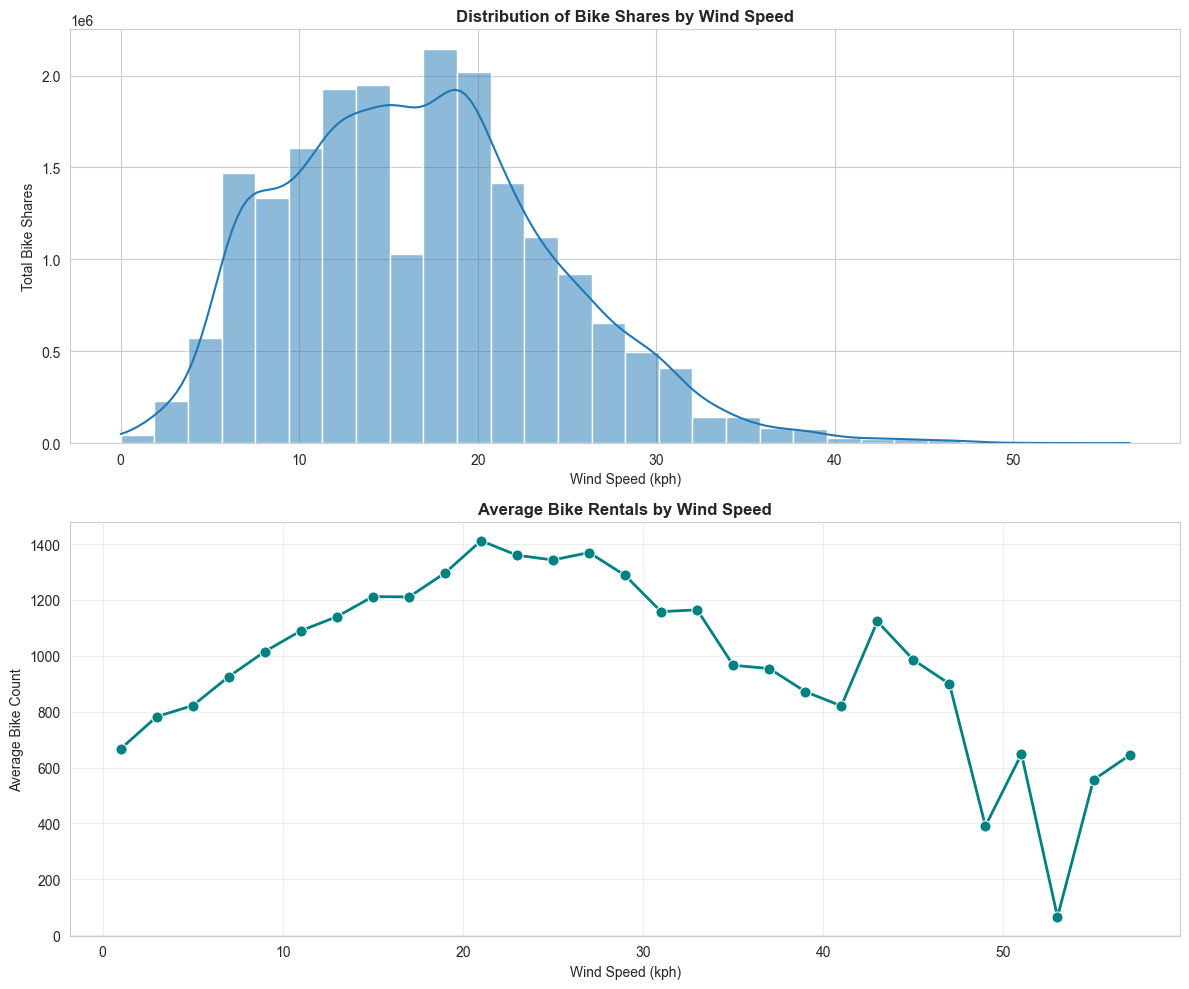

In [30]:
# Wind speed analysis
wind_corr = bikes['wind_speed_kph'].corr(bikes['count'])
print(f"Correlation between Wind Speed and Bike Count: {wind_corr:.3f}")

# Create wind speed bins
wind_min = np.floor(bikes['wind_speed_kph'].min())
wind_max = np.ceil(bikes['wind_speed_kph'].max())
bins = np.arange(wind_min, wind_max + 2, 2)
bikes['wind_bin'] = pd.cut(bikes['wind_speed_kph'], bins=bins, include_lowest=True)

wind_avg = bikes.groupby('wind_bin', observed=True)['count'].mean().reset_index()
wind_avg['bin_center'] = wind_avg['wind_bin'].apply(lambda x: x.mid)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Distribution
sns.histplot(data=bikes, x='wind_speed_kph', weights='count', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Bike Shares by Wind Speed', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Wind Speed (kph)')
axes[0].set_ylabel('Total Bike Shares')

# Average by wind speed
sns.lineplot(data=wind_avg, x='bin_center', y='count', marker='o', markersize=8, 
             linewidth=2, color='teal', ax=axes[1])
axes[1].set_title('Average Bike Rentals by Wind Speed', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Wind Speed (kph)')
axes[1].set_ylabel('Average Bike Count')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.4 Weather Conditions Analysis

Statistics by Weather Condition:
                           Mean  Median      Std  Count  Freq_%
weather                                                        
Broken Clouds           1195.12   964.0  1014.75   3551    20.4
Clear                   1162.09   745.0  1187.22   6150    35.3
Cloudy                   635.23   355.0   751.41   1464     8.4
Rain                     712.97   471.0   764.88   2141    12.3
Rain with Thunderstorm   583.43   620.5   283.00     14     0.1
Scattered Clouds        1496.18  1291.0  1085.03   4034    23.2
Snowfall                 250.85    88.0   470.59     60     0.3


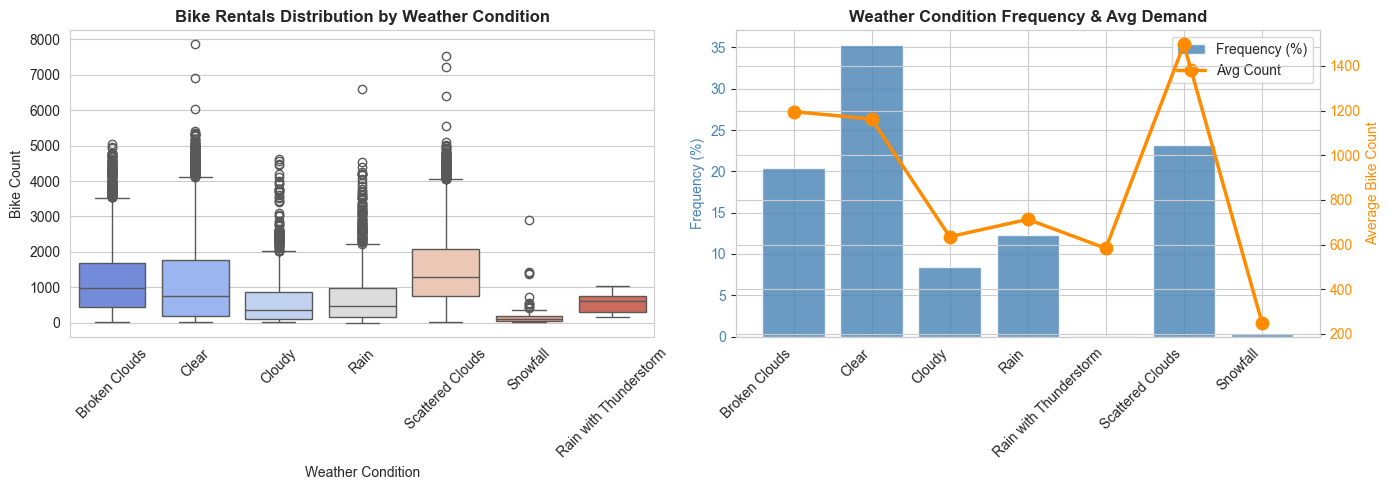


  Best avg demand  : Scattered Clouds (1496 avg)
  Worst avg demand : Snowfall (251 avg)
  Most frequent    : Clear (35.3% of observations)


In [31]:
# Weather conditions analysis
weather_stats = bikes.groupby('weather')['count'].agg([
    ('Mean',   'mean'),
    ('Median', 'median'),
    ('Std',    'std'),
    ('Count',  'count')
]).round(2)

# Add frequency percentage
weather_stats['Freq_%'] = (weather_stats['Count'] / weather_stats['Count'].sum() * 100).round(1)

print("Statistics by Weather Condition:")
print("=" * 65)
print(weather_stats.to_string())
print("=" * 65)

# Visualization — two panels: box plot + frequency bar
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(data=bikes, x='weather', y='count', palette='coolwarm', ax=axes[0])
axes[0].set_title('Bike Rentals Distribution by Weather Condition',
                  fontweight='bold')
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Bike Count')
axes[0].tick_params(axis='x', rotation=45)

# Frequency + mean overlay (dual-axis)
weather_order = weather_stats.index.tolist()
x = range(len(weather_order))
color_freq = 'steelblue'
color_mean = 'darkorange'

ax2 = axes[1]
bars = ax2.bar(x, weather_stats.loc[weather_order, 'Freq_%'],
               color=color_freq, alpha=0.8, edgecolor='white', label='Frequency (%)')
ax2.set_ylabel('Frequency (%)', color=color_freq)
ax2.tick_params(axis='y', labelcolor=color_freq)
ax2.set_xticks(x)
ax2.set_xticklabels(weather_order, rotation=45, ha='right')
ax2.set_title('Weather Condition Frequency & Avg Demand', fontweight='bold')

ax2b = ax2.twinx()
ax2b.plot(x, weather_stats.loc[weather_order, 'Mean'],
          marker='o', linewidth=2.5, markersize=9,
          color=color_mean, label='Avg Count')
ax2b.set_ylabel('Average Bike Count', color=color_mean)
ax2b.tick_params(axis='y', labelcolor=color_mean)

# Combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2b.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

weather_mean = bikes.groupby('weather')['count'].mean().sort_values(ascending=False)
best_weather  = weather_mean.idxmax()
worst_weather = weather_mean.idxmin()
most_common   = weather_stats['Count'].idxmax()
print(f"\n  Best avg demand  : {best_weather} ({weather_mean.max():.0f} avg)")
print(f"  Worst avg demand : {worst_weather} ({weather_mean.min():.0f} avg)")
print(f"  Most frequent    : {most_common} "
      f"({weather_stats.loc[most_common, 'Freq_%']:.1f}% of observations)")


---

## 7. Correlation Analysis

### 7.1 Correlation Matrix

Correlation Matrix:
                   count  temp_real_C  temp_feels_like_C  humidity_percent  \
count              1.000        0.389              0.369            -0.463   
temp_real_C        0.389        1.000              0.988            -0.448   
temp_feels_like_C  0.369        0.988              1.000            -0.403   
humidity_percent  -0.463       -0.448             -0.403             1.000   
wind_speed_kph     0.116        0.145              0.088            -0.288   
is_holiday        -0.052       -0.042             -0.040             0.032   
is_weekend        -0.096       -0.005             -0.009             0.028   
hour               0.324        0.169              0.154            -0.296   
month              0.064        0.333              0.368             0.113   

                   wind_speed_kph  is_holiday  is_weekend   hour  month  
count                       0.116      -0.052      -0.096  0.324  0.064  
temp_real_C                 0.145      -0.042      

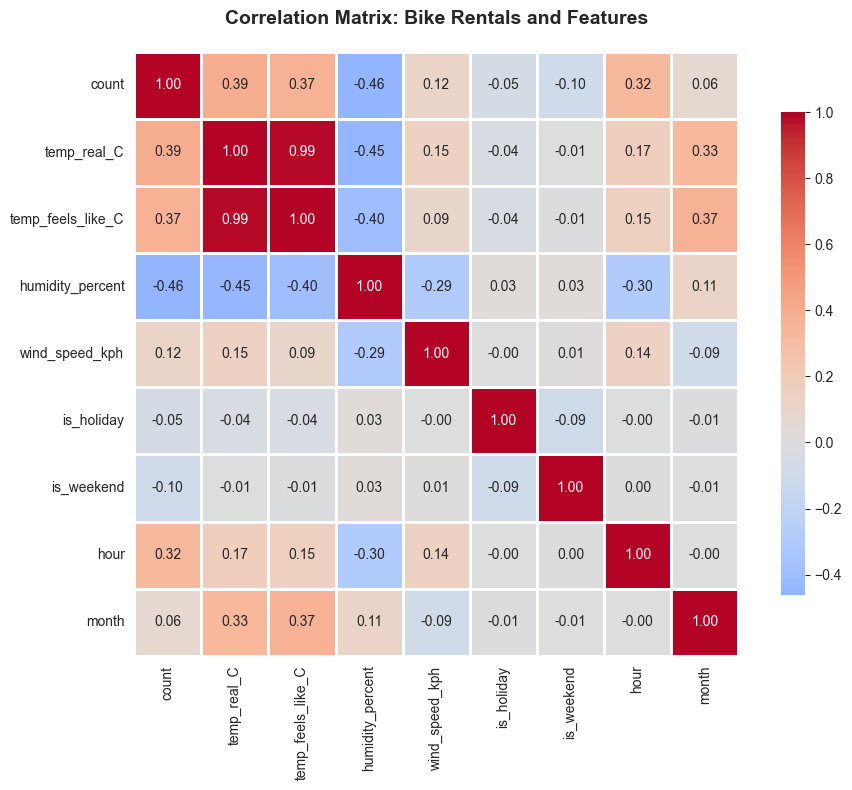


Top Correlations with Bike Count:
  temp_real_C              :  0.389
  temp_feels_like_C        :  0.369
  hour                     :  0.324
  wind_speed_kph           :  0.116
  month                    :  0.064
  is_holiday               : -0.052
  is_weekend               : -0.096
  humidity_percent         : -0.463


In [32]:
# Calculate correlation matrix
correlation_vars = ['count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent', 
                    'wind_speed_kph', 'is_holiday', 'is_weekend', 'hour', 'month']

corr_matrix = bikes[correlation_vars].corr()

print("Correlation Matrix:")
print("=" * 80)
print(corr_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Bike Rentals and Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with count
count_corr = corr_matrix['count'].drop('count').sort_values(ascending=False)
print("\nTop Correlations with Bike Count:")
print("=" * 60)
for var, corr in count_corr.items():
    print(f"  {var:25s}: {corr:6.3f}")

### 7.2 Pairwise Relationships

Generating pairplot with full dataset (17414 rows)...


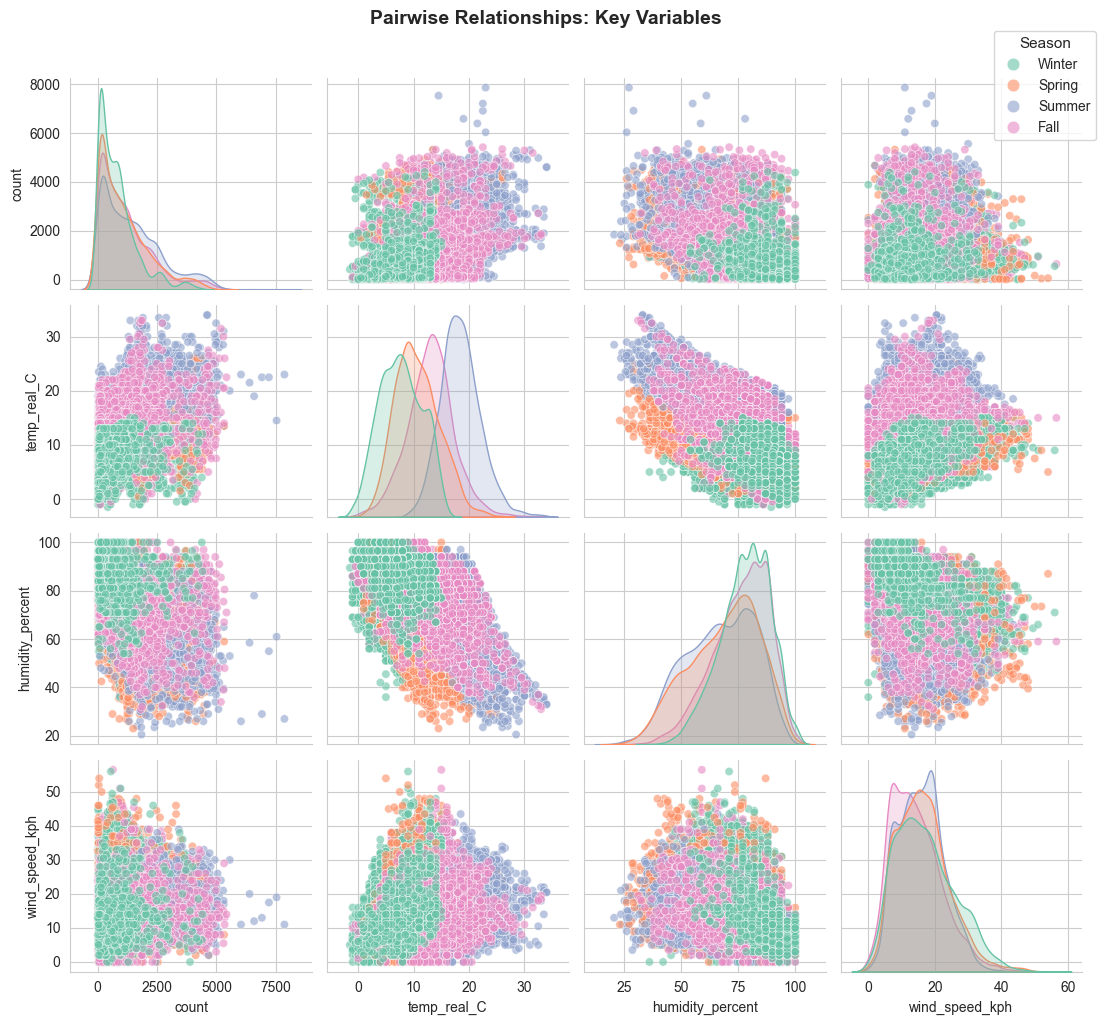

In [42]:
# Create pairplot for key variables (full dataset)
print(f"Generating pairplot with full dataset ({len(bikes)} rows)...")

plot_data = bikes[['count', 'temp_real_C', 'humidity_percent', 'wind_speed_kph', 'season']].copy()

g = sns.pairplot(plot_data, hue='season', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.6})

g.fig.suptitle('Pairwise Relationships: Key Variables', y=1.02, fontsize=14, fontweight='bold')

# Fix legend visibility
g._legend.remove()  # Remove the default legend
handles = g._legend_data.values()
labels  = g._legend_data.keys()
g.fig.legend(
    handles=handles,
    labels=labels,
    title='Season',
    loc='upper right',         # Pin to upper-right of the figure
    bbox_to_anchor=(1.0, 1.0), # Anchor point at top-right corner
    borderaxespad=0.1,
    frameon=True,
    fontsize=10,
    title_fontsize=11,
    markerscale=1.5,           # Larger markers so dots are clearly visible
)

plt.tight_layout()
plt.show()

---

## 8. Statistical Summary

### Key Statistical Insights

In [36]:
# Generate key insights
insights = []

# Overall statistics
total_rentals   = bikes['count'].sum()
avg_rentals     = bikes['count'].mean()
peak_day        = bikes.groupby(bikes['time'].dt.date)['count'].sum().idxmax()
peak_day_count  = bikes.groupby(bikes['time'].dt.date)['count'].sum().max()

insights.append(f"Total bike rentals     : {total_rentals:,}")
insights.append(f"Average hourly rentals : {avg_rentals:.0f}")
insights.append(f"Peak day               : {peak_day} ({peak_day_count:,} rentals)")

# Temperature insights
insights.append(f"Temp correlation       : {temp_corr_real:.3f} (moderate positive)")
insights.append(f"Optimal temperature    : ~{optimal_temp:.1f}°C")

# Temporal insights (peak_hour / peak_value / low_hour / low_value defined in section 5.6)
insights.append(f"Peak rental hour       : {peak_hour}:00  ({peak_value:.0f} avg)")
insights.append(f"Lowest rental hour     : {low_hour}:00  ({low_value:.0f} avg)")

# Weather insights
insights.append(f"Best weather           : {best_weather} ({weather_mean.max():.0f} avg)")
insights.append(f"Worst weather          : {worst_weather} ({weather_mean.min():.0f} avg)")

# Seasonal insights (compute inline)
season_order   = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_stats = bikes.groupby('season')['count'].agg(
    Mean='mean', Median='median', Total='sum', Std='std'
).round(2).reindex(season_order)

best_season  = seasonal_stats['Mean'].idxmax()
worst_season = seasonal_stats['Mean'].idxmin()
insights.append(f"Best season            : {best_season} ({seasonal_stats.loc[best_season,  'Mean']:.0f} avg)")
insights.append(f"Worst season           : {worst_season} ({seasonal_stats.loc[worst_season, 'Mean']:.0f} avg)")

print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)
for insight in insights:
    print(f"  {insight}")
print("="*70)



KEY INSIGHTS
  Total bike rentals     : 19,905,972
  Average hourly rentals : 1143
  Peak day               : 2015-07-09 (72,504 rentals)
  Temp correlation       : 0.389 (moderate positive)
  Optimal temperature    : ~29.0°C
  Peak rental hour       : 8:00  (2883 avg)
  Lowest rental hour     : 4:00  (73 avg)
  Best weather           : Scattered Clouds (1496 avg)
  Worst weather          : Snowfall (251 avg)
  Best season            : Summer (1464 avg)
  Worst season           : Winter (822 avg)


---

## 9. Data Export for Visualization

In [37]:
# Display final dataframe structure
print("Final Dataset Structure:")
print("=" * 60)
print(f"Shape: {bikes.shape[0]:,} rows × {bikes.shape[1]} columns")
print(f"\nColumns: {list(bikes.columns)}")
print(f"\nData types:")
print(bikes.dtypes)

Final Dataset Structure:
Shape: 17,414 rows × 24 columns

Columns: ['time', 'count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph', 'weather', 'is_holiday', 'is_weekend', 'season', 'year', 'month', 'day', 'hour', 'day_of_week', 'day_name', 'month_name', 'quarter', 'week_of_year', 'count_ma_7d', 'count_ma_30d', 'temp_bin', 'humidity_bin', 'wind_bin']

Data types:
time                 datetime64[ns]
count                         int64
temp_real_C                 float64
temp_feels_like_C           float64
humidity_percent            float64
wind_speed_kph              float64
weather                      object
is_holiday                  float64
is_weekend                  float64
season                       object
year                          int32
month                         int32
day                           int32
hour                          int32
day_of_week                   int32
day_name                     object
month_name                   obj

In [38]:
# Show sample of final data
print("Sample of final dataset (first 5 rows):")
bikes.head()

Sample of final dataset (first 5 rows):


,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month,day,hour,day_of_week,day_name,month_name,quarter,week_of_year,count_ma_7d,count_ma_30d,temp_bin,humidity_bin,wind_bin
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,Winter,2015,1,4,0,6,Sunday,January,1,1,182.000000,182.000000,"(2.0, 4.0]","(90.0, 95.0]","(4.0, 6.0]"
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,2015,1,4,1,6,Sunday,January,1,1,160.000000,160.000000,"(2.0, 4.0]","(90.0, 95.0]","(4.0, 6.0]"
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter,2015,1,4,2,6,Sunday,January,1,1,151.333333,151.333333,"(2.0, 4.0]","(95.0, 100.0]","(-0.001, 2.0]"
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter,2015,1,4,3,6,Sunday,January,1,1,131.500000,131.500000,"(0.0, 2.0]","(95.0, 100.0]","(-0.001, 2.0]"
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter,2015,1,4,4,6,Sunday,January,1,1,114.600000,114.600000,"(0.0, 2.0]","(90.0, 95.0]","(6.0, 8.0]"


### 9.1 Export to Excel

In [ ]:
# Export to Excel for Tableau visualization
output_file = 'london_bikes_final.xlsx'
bikes.to_excel(output_file, sheet_name='Data', index=False)

file_path = os.path.abspath(output_file)
file_size = os.path.getsize(output_file) / (1024 * 1024)  # Size in MB

print("Data exported successfully!")
print("=" * 60)
print(f"File: {output_file}")
print(f"Location: {file_path}")
print(f"Size: {file_size:.2f} MB")
print(f"Rows: {bikes.shape[0]:,}")
print(f"Columns: {bikes.shape[1]}")
print("\nReady for Tableau visualization")

✓ Data exported successfully!
File: london_bikes_final.xlsx
Location: c:\Users\m\Downloads\london_bikes_final.xlsx
Size: 1.77 MB
Rows: 17,414
Columns: 24

Ready for Tableau visualization!


## Tableau Dashboard Link:
https://public.tableau.com/shared/SXFWWPP9N?:display_count=n&:origin=viz_share_link

# Conclusion

Based on the exploratory data analysis, the following factors drive bike-sharing demand in London, ranked from most to least impactful:

**1. Time of Day** — This largely decides *when* people will use bike shares, while the weather factors decide *if*. Demand has two sharp, predictable spikes starting at the early morning 8AM and again at 5PM. The difference between peak and trough hours is roughly 40x. This likely is primarly motivated by commuting times for events like work and school.

**2. Temperature / Feels-Like** — strong positive correlation (~0.4). Demand climbs steadily with warmth and drops sharply in cold conditions. This is what drives the seasonal pattern more than the calendar itself.

**3. Season / Month** — closely tied to temperature, but worth calling out separately because it captures daylight hours and general weather patterns together. Summer is roughly 2x winter demand.

**4. Day of Week** — weekdays vs. weekends tells a clear story. Weekdays are commute-driven (sharp peaks), weekends are leisure-driven (flatter, later curve). The *shape* of demand changes more than the total volume.

**5. Weather Condition** — Clear vs. Snowfall is a massive gap (roughly 6x difference in average demand), but severe weather is rare. Because bad weather is infrequent, it has high impact when it hits, especially rain with thunderstorms, but low overall influence on aggregate patterns.

**6. Humidity** — negative correlation, but weaker than temperature. High humidity suppresses demand, though it is partially captured already by feels-like temperature.

**7. Wind Speed** — weakest of the weather variables. Small negative correlation, limited practical significance on its own.